In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw

In [2]:
import matplotlib as mpl; from scipy import stats

In [3]:
# Winter, NMAB
mean_w_x = [44.07920792079208, 37.4, 45.60526315789474, 19.12, 25.65625, 34.12903225806452, 31.733333333333334, 13.857142857142858, 45.51470588235294, 36.026315789473685, 56.0, 52.96551724137931, 38.294117647058826, 40.97435897435897, 35.10344827586207, 44.05263157894737, 35.88461538461539, 50.375, 47.69565217391305, 35.21739130434783, 32.0, nan, nan, nan, 59.8421052631579, nan]
std_w_x= [18.062971899110515, 16.34849636307062, 17.821541479911932, 16.182261893814474, 10.743048260968578, 15.849579083622116, 19.177996651255196, 9.601764293660846, 17.673087422155245, 17.68360352968291, 21.75239450420727, 22.947440332985064, 16.094444441126637, 22.713925672610646, 18.42289585156659, 16.602072426786542, 16.907729054345175, 13.506364240608944, 17.664591905372873, 16.738283434245634, 22.084254248542912, nan, nan, nan, 16.281287799494617, nan]
ratio_mean_w_x= [0.707581542392159, 0.6337491258571364, 0.7616256215457365, 0.3513413890085308, 0.42704737013358324, 0.5151677012434108, 0.4527748141941308, 0.185016508709988, 0.6457040525850541, 0.5389801738051019, 0.6678324440438074, 0.6822067752078238, 0.49671526796112864, 0.5869097079489375, 0.5629044096168495, 0.6805678842271558, 0.5919656040493678, 0.786689011192429, 0.7673855179160253, 0.527199878774845, 0.5426180557967244, nan, nan, nan, 0.8427971692927151, nan]
ratio_std_w_x= [0.311248176994861, 0.32849145562229454, 0.292376208987613, 0.34070453775803, 0.2347221202646583, 0.3203365967697555, 0.3127519442682659, 0.13872238327992084, 0.29021106878869457, 0.32339126199876134, 0.3174339438141282, 0.2586938357739047, 0.2887823437161619, 0.32705490087724953, 0.3622097413841136, 0.34147939084276835, 0.2884982793496632, 0.26583747484840753, 0.30523370774684366, 0.31464669667066286, 0.3904364177493354, nan, nan, nan, 0.24171884871101296, nan]
total_years = [1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

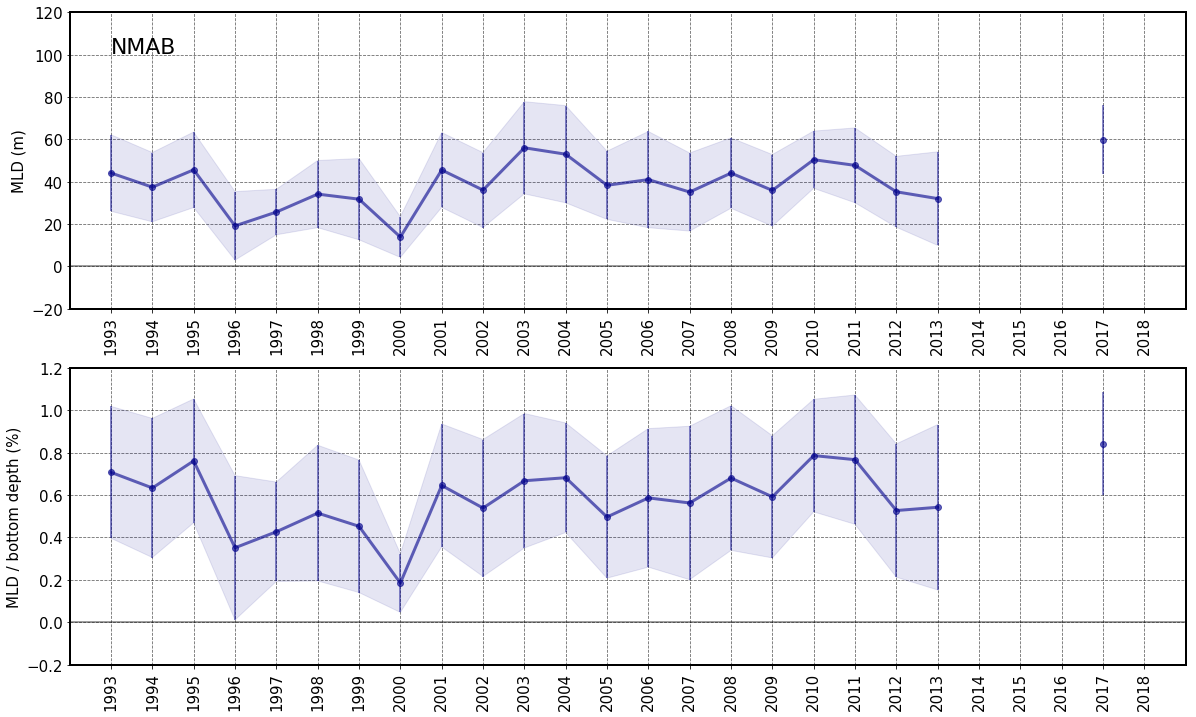

In [244]:
import numpy as np; import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.figure(1)

plt.subplot(211)
array_mean = np.asarray(mean_w_x)
array_std = np.asarray(std_w_x)
plt.ylim(-20,120)
plt.xlim(1992,2019)
plt.plot(total_years, mean_w_x, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,mean_w_x, std_w_x,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(1993, 100.5, 'NMAB', dict(size=22))

plt.subplot(212)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
array_mean = np.asarray(ratio_mean_w_x)
array_std = np.asarray(ratio_std_w_x)
plt.ylim(-0.2,1.2)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean_w_x, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean_w_x, ratio_std_w_x,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [242]:
# Winter, SMAB
mean_w_v= [48.53061224489796, 37.80701754385965, 42.31578947368421, 34.72222222222222, 28.066666666666666, 34.904761904761905, 28.782608695652176, 50.958333333333336, 42.392857142857146, 38.38235294117647, 47.17142857142857, 50.138888888888886, 42.484848484848484, 27.980392156862745, 46.36363636363637, 31.34375, 43.975, 38.38461538461539, 37.2, 35.02325581395349, 27.485714285714284, nan, nan, nan, 63.45454545454545, nan]
std_w_v= [25.521581136496792, 28.45275468209875, 25.59204776072555, 20.17737701510968, 12.011846004858889, 24.969323582776646, 16.14864786839182, 33.93741687118937, 21.481452607364545, 27.38023622323479, 35.26267611130233, 41.66810182713562, 15.201916171327662, 14.737560651744916, 26.043374953808343, 15.06778304653674, 27.73128873673202, 19.0183654621545, 17.422153385027595, 30.28046294083536, 21.823148166989274, nan, nan, nan, 38.59666409599207, nan]
ratio_mean_w_v= [0.8269147396790898, 0.6261017668460084, 0.8383365565384873, 0.5338418731060213, 0.5207473423221128, 0.5531930098554239, 0.47344807828343444, 0.6257186715208429, 0.5810188318167396, 0.5714690055848336, 0.519014144881566, 0.574817933431198, 0.5983776385139374, 0.4196131236203658, 0.5952703591105999, 0.6228569013448897, 0.6828790144291325, 0.6777136408935652, 0.6609411282622041, 0.5407722929601572, 0.6033460658164179, nan, nan, nan, 0.9109447675555259, nan]
ratio_std_w_v= [0.2859185282919658, 0.35633575563789405, 0.23714159407341887, 0.32452078860020606, 0.3282438105815683, 0.36326142268138756, 0.32141652133780213, 0.34176035221706713, 0.3519412719081318, 0.3476757168268356, 0.3398192496272107, 0.3474421004689925, 0.30269511203841354, 0.27230060521720806, 0.28816686228135857, 0.31343189764761714, 0.3269910362534916, 0.25037213808232045, 0.338938942242885, 0.32709994465019254, 0.3506684264057697, nan, nan, nan, 0.19582743885462903, nan]

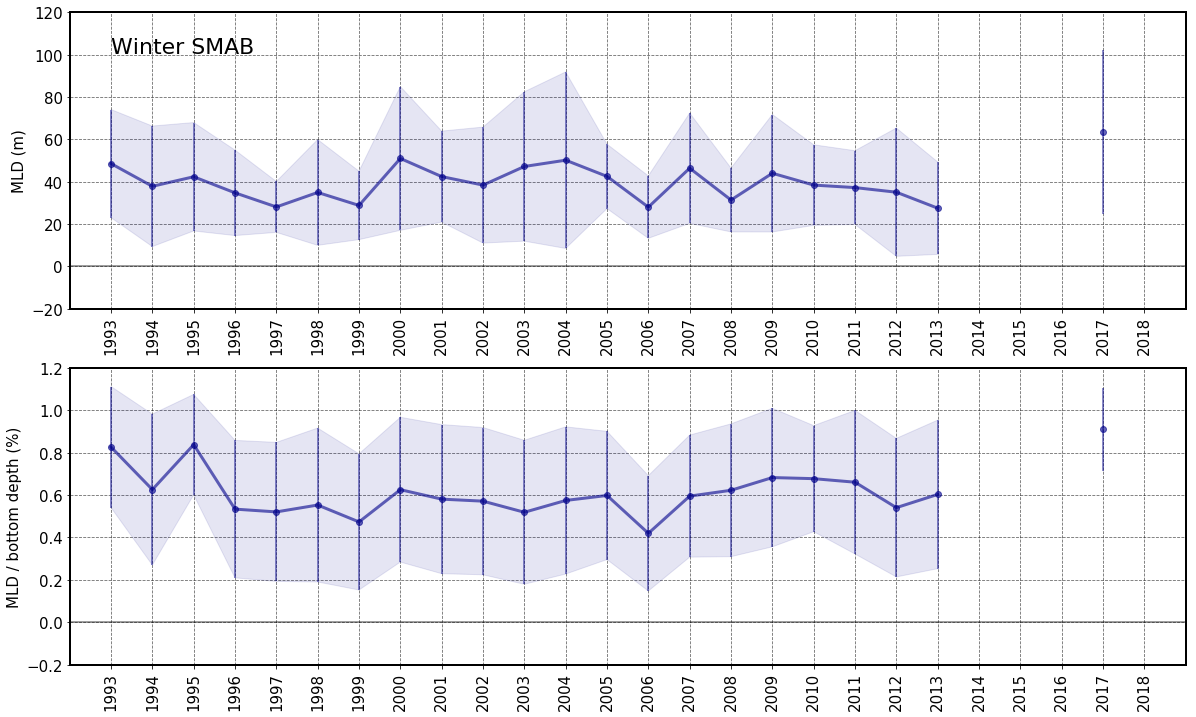

In [243]:
import numpy as np; import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.figure(1)

plt.subplot(211)
array_mean = np.asarray(mean_w_v)
array_std = np.asarray(std_w_v)
plt.ylim(-20,120)
plt.xlim(1992,2019)
plt.plot(total_years, mean_w_v, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,mean_w_v, std_w_v,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(1993, 100.5, 'Winter SMAB', dict(size=22))

plt.subplot(212)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
array_mean = np.asarray(ratio_mean_w_v)
array_std = np.asarray(ratio_std_w_v)
plt.ylim(-0.2,1.2)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean_w_v, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean_w_v, ratio_std_w_v,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [240]:
# Winter, GB
mean_w_w= [48.8, 37.80701754385965, 42.8, 34.72222222222222, 28.152173913043477, 34.31111111111111, 28.893617021276597, 50.19607843137255, 41.71641791044776, 36.46052631578947, 50.95238095238095, 59.0, 41.404761904761905, 26.789473684210527, 45.642857142857146, 31.34375, 43.395348837209305, 37.44444444444444, 45.627906976744185, 39.58490566037736, 27.485714285714284, nan, nan, nan, 63.45454545454545, nan]
std_w_w= [25.335350796860894, 28.45275468209875, 25.033177984426988, 20.17737701510968, 11.894403856443962, 24.87910521990712, 15.9936610349268, 33.280165209716216, 21.476683622185256, 26.73231869630628, 37.17907269838798, 49.9799959983992, 17.84197768747774, 14.550259950780001, 25.637418178988963, 15.06778304653674, 27.29608502031843, 19.268729865180113, 39.22328642458247, 34.03074856115583, 21.823148166989274, nan, nan, nan, 38.59666409599207, nan]
ratio_mean_w_w= [0.8155216731012755, 0.6261017668460084, 0.8088006810925155, 0.5338418731060213, 0.5119472268147954, 0.5232534532852642, 0.466388899312865, 0.5959682380885916, 0.5086582444479603, 0.519590710288124, 0.4766145929955541, 0.5651843516997671, 0.4981663631924178, 0.38010533417639425, 0.5574601143561974, 0.6228569013448897, 0.6402844160416541, 0.6536713367334862, 0.5698810210751148, 0.4699815904614648, 0.6033460658164179, nan, nan, nan, 0.9109447675555259, nan]
ratio_std_w_w= [0.29406583116797086, 0.35633575563789405, 0.2645738454317386, 0.32452078860020606, 0.3299797415231035, 0.3691748775470538, 0.321563053921358, 0.35248586218845, 0.36325447693071217, 0.36219967709301, 0.3308297815076379, 0.3345048345398983, 0.33242991447320575, 0.2822013948587875, 0.3035743621558196, 0.31343189764761714, 0.35172739441362455, 0.27457847377472905, 0.3641906246603656, 0.33467271669895904, 0.3506684264057697, nan, nan, nan, 0.19582743885462903, nan]

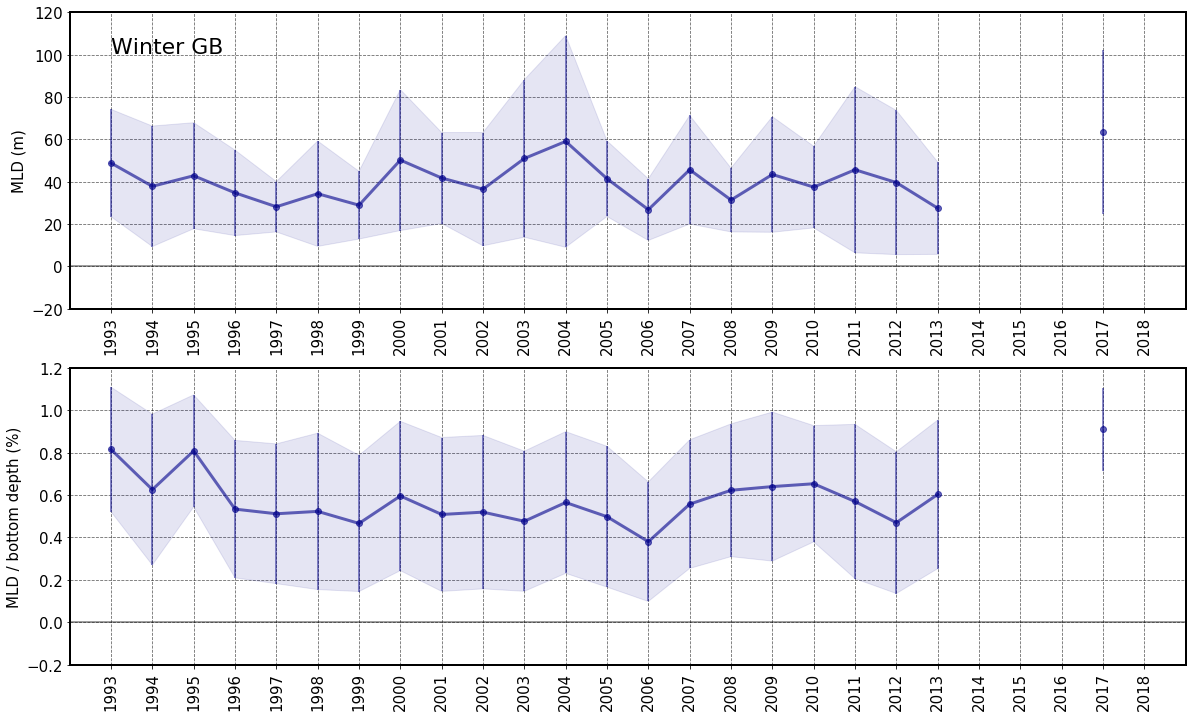

In [241]:
plt.figure(figsize=(20,12))
plt.figure(1)

plt.subplot(211)
array_mean = np.asarray(mean_w_w)
array_std = np.asarray(std_w_w)
plt.ylim(-20,120)
plt.xlim(1992,2019)
plt.plot(total_years, mean_w_w, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,mean_w_w, std_w_w,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(1993, 100.5, 'Winter GB', dict(size=22))
# plt.text(1.25, 40.5, '(b)', dict(size=30))

plt.subplot(212)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
array_mean = np.asarray(ratio_mean_w_w)
array_std = np.asarray(ratio_std_w_w)
plt.ylim(-0.2,1.2)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean_w_w, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean_w_w, ratio_std_w_w,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [236]:
# Winter, EGOM
mean_w_y= [30.0, nan, 27.76923076923077, 41.666666666666664, 73.75, 35.675, 33.38461538461539, nan, nan, 33.857142857142854, nan, 30.0, 34.25, 41.18181818181818, 51.166666666666664, 54.84615384615385, 61.666666666666664, 27.5, 38.8, 52.92307692307692, 63.0, nan, nan, nan, 50.4, nan]
std_w_y= [5.138093031466052, nan, 21.846153846153843, 24.023136995636335, 31.074853177448805, 17.683696587535085, 21.769910291106857, nan, nan, 23.015079351395258, nan, 0.0, 26.87044535048374, 23.5596657709669, 23.80417797129086, 28.926554619072377, 39.4257389136702, 7.5, 25.419677417308034, 37.03109200587972, 25.80697580112788, nan, nan, nan, 25.42911716910361, nan]
ratio_mean_w_y= [0.3358017153295403, nan, 0.22671138023091866, 0.43675360139071145, 0.5339440533665948, 0.2834446321472033, 0.33930841702195613, nan, nan, 0.2176874752822817, nan, 0.08379888268156424, 0.1769241851424785, 0.30994580238170627, 0.3007698720640541, 0.3042439202755865, 0.337452208539597, 0.244281045751634, 0.19834700716845652, 0.27694907288439996, 0.3315273022975234, nan, nan, nan, 0.47273148690704064, nan]
ratio_std_w_y= [0.14099126271288828, nan, 0.16236536843826277, 0.3512347463561351, 0.3087220287195239, 0.2890416682536581, 0.3183569594346406, nan, nan, 0.23861671524841607, nan, 0.0, 0.11931812143854141, 0.2680318499291306, 0.23318606275947357, 0.2644524011383129, 0.2825712717224708, 0.049836601307189546, 0.17377110056039477, 0.19933441037900362, 0.15131131366250322, nan, nan, nan, 0.4345835968670595, nan]

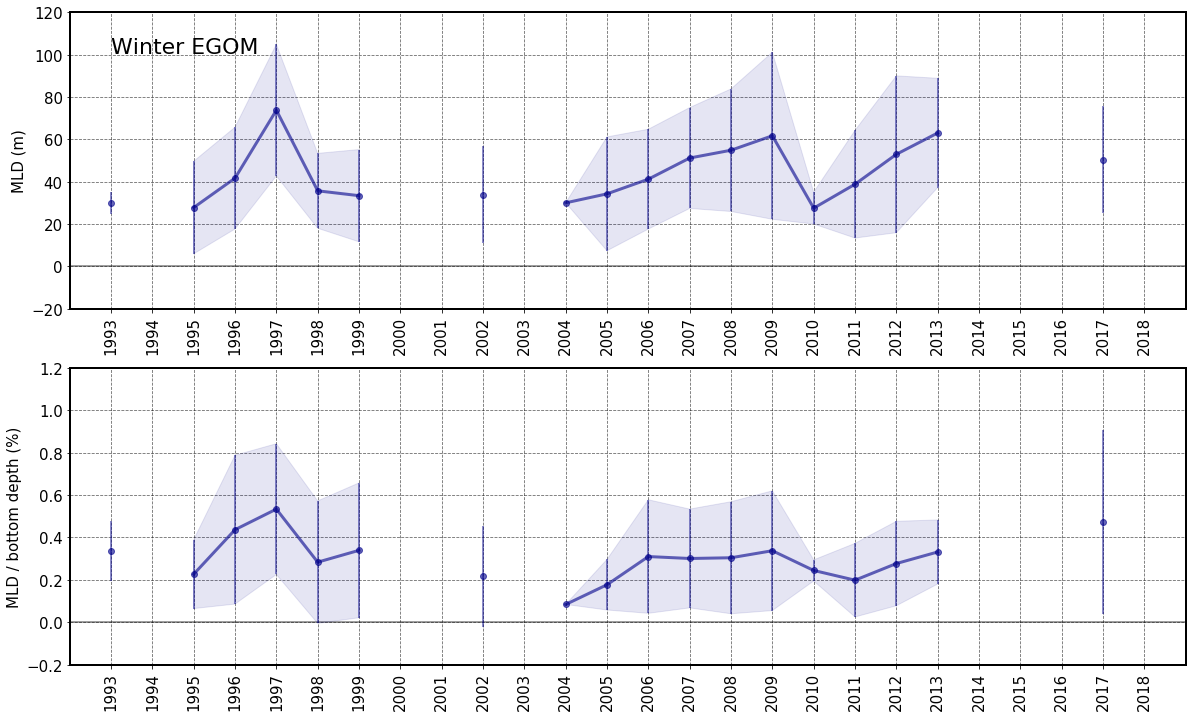

In [239]:
plt.figure(figsize=(20,12))
plt.figure(1)

plt.subplot(211)
array_mean = np.asarray(mean_w_y)
array_std = np.asarray(std_w_y)
plt.ylim(-20,120)
plt.xlim(1992,2019)
plt.plot(total_years, mean_w_y, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,mean_w_y, std_w_y,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(1993, 100.5, 'Winter EGOM', dict(size=22))
# plt.text(1.25, 40.5, '(b)', dict(size=30))

plt.subplot(212)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
array_mean = np.asarray(ratio_mean_w_y)
array_std = np.asarray(ratio_std_w_y)
plt.ylim(-0.2,1.2)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean_w_y, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean_w_y, ratio_std_w_y,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [90]:
# Winter, WGOM
mean_w_t= [43.25925925925926, 41.285714285714285, 89.0909090909091, 55.27272727272727, 89.76153846153846, 73.87857142857142, 47.05882352941177, nan, nan, 72.53333333333333, 102.0, 107.0, 89.23076923076923, 47.0, 96.17647058823529, 72.27450980392157, 76.78947368421052, 60.32258064516129, 54.71153846153846, 66.8, 87.0952380952381, nan, nan, nan, 109.22222222222223, nan]
std_w_t= [28.205059426086677, 22.584535073580682, 42.36412407054421, 57.789729992118694, 14.812600585132733, 40.15578909645761, 31.027446271733815, nan, nan, 35.9719643920404, 50.76908508137605, 36.753231150471656, 26.498632319289605, 28.971855671541505, 21.505772943472497, 42.99615962393347, 37.7353372672136, 33.969518686491334, 26.902485257272264, 24.991198450654583, 61.12976421157175, nan, nan, nan, 51.291709916640905, nan]
ratio_mean_w_t= [0.42074765903114586, 0.43713610118278673, 0.6042688118205379, 0.4486513772973874, 0.6866678560216529, 0.5805954217866672, 0.35711836444435974, nan, nan, 0.5739108089769196, 0.8391025641025641, 0.5138684009645145, 0.5542167964533161, 0.27393478129858034, 0.6663079978561219, 0.427344504714124, 0.45282531192919623, 0.5862450715579746, 0.4980527273274417, 0.5128588761603706, 0.6544113976909399, nan, nan, nan, 0.7059381566723888, nan]
ratio_std_w_t= [0.25120809869657745, 0.2912887771652436, 0.3116424636855459, 0.43978837085522315, 0.1927516206022238, 0.3324208143611038, 0.20570629704828333, nan, nan, 0.34617597514247767, 0.17013525771326699, 0.10967860255829848, 0.2578922471613443, 0.20916925150619137, 0.25024970323939477, 0.273429275661388, 0.23605000051658873, 0.2966113280605441, 0.3168230303921824, 0.2102495021571248, 0.3477585943834537, nan, nan, nan, 0.27690129646267464, nan]

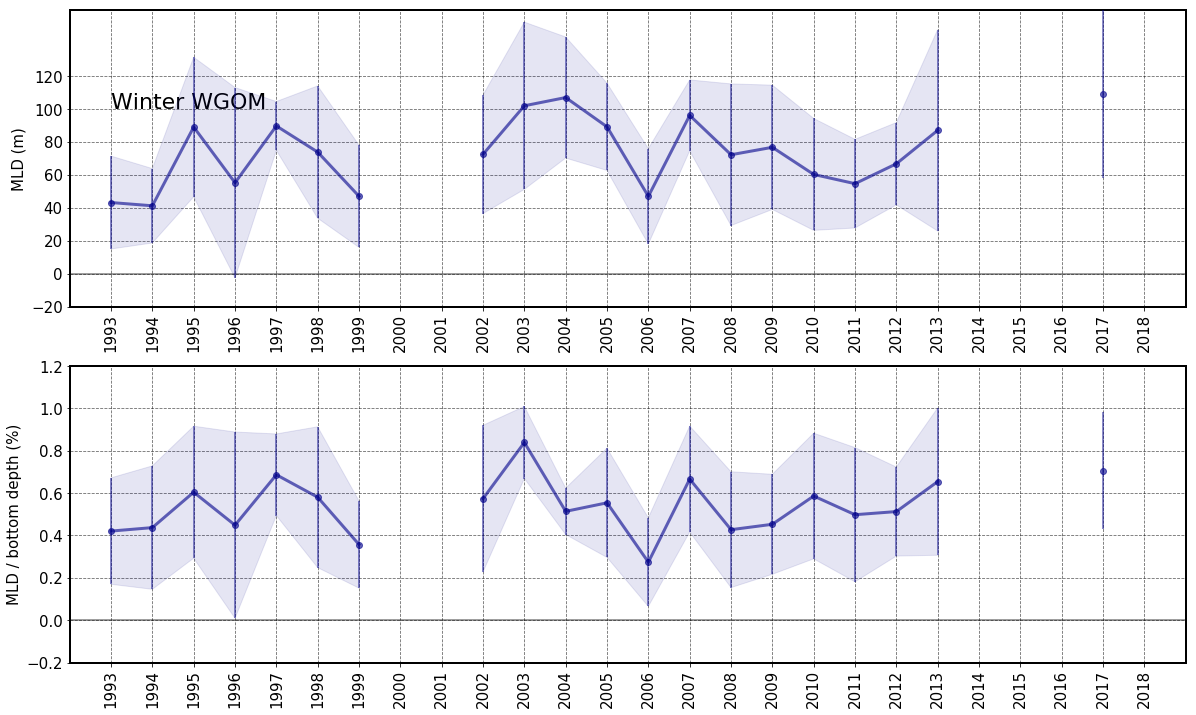

In [247]:
plt.figure(figsize=(20,12))
plt.figure(1)

plt.subplot(211)
array_mean = np.asarray(mean_w_t)
array_std = np.asarray(std_w_t)
plt.ylim(-20,160)
plt.xlim(1992,2019)
plt.plot(total_years, mean_w_t, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,mean_w_t, std_w_t,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(1993, 100.5, 'Winter WGOM', dict(size=22))
# plt.text(1.25, 40.5, '(b)', dict(size=30))

plt.subplot(212)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
array_mean = np.asarray(ratio_mean_w_t)
array_std = np.asarray(ratio_std_w_t)
plt.ylim(-0.2,1.2)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean_w_t, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean_w_t, ratio_std_w_t,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [7]:
# Spring, WGOM
mean_sp_t= [28.43243243243243, 22.8, 24.0, 21.294117647058822, 40.68888888888889, 17.145744680851063, 37.246753246753244, 29.2, 8.872340425531915, 18.953488372093023, 21.950819672131146, 25.611842105263158, 14.952941176470588, 14.076305220883533, 52.55, 26.271186440677965, 22.06451612903226, 12.83673469387755, 17.901960784313726, 15.660377358490566, 15.75438596491228, 19.11111111111111, 19.40909090909091, 8.23076923076923, 15.023809523809524, 10.424242424242424]
std_sp_t= [21.712545309405858, 14.258431089809887, 25.2597615894441, 15.487242210292857, 36.87264702683321, 11.13614648287295, 37.828099170605846, 14.214278535533005, 4.169887091060808, 10.048610891785787, 14.405629852918098, 35.715625605554244, 11.274026247089777, 9.074778632679775, 49.34620046163635, 27.67231407723194, 19.177331180784307, 5.592804921396448, 16.357830650985026, 10.9123611109069, 14.555737642152371, 22.482640765765687, 13.849819244775277, 2.374669083143559, 10.154727013840578, 3.1045450848159266]
ratio_mean_sp_t= [0.21129615421404868, 0.18026546986332542, 0.22684610251314563, 0.19669042114259874, 0.3419075009207514, 0.13915890285746402, 0.286868882906703, 0.22341336608910348, 0.08690131615931611, 0.15640674901793022, 0.15116520830080418, 0.1771915896923939, 0.1129950721959759, 0.11363642281286926, 0.42647468133979666, 0.163174809923233, 0.17303658559902202, 0.0894636565350207, 0.1427201631171313, 0.13438320639575596, 0.13281896533931478, 0.1505690454439097, 0.16282365284897776, 0.05279506986204803, 0.12323553435731875, 0.08253667815487234]
ratio_std_sp_t= [0.20644836698806907, 0.19090793917229304, 0.2993121855683958, 0.21257662096792135, 0.31382301004771856, 0.13504511382946213, 0.30112520607953736, 0.1781510341883039, 0.1411337387594127, 0.14861465540060317, 0.0958920704034978, 0.22155051826475014, 0.10180068953907356, 0.11625814162618758, 0.40390457143360764, 0.1632385894445616, 0.18184673927166053, 0.04920187721127819, 0.16905811837667273, 0.1325436730013727, 0.1802525084950818, 0.21906713085619534, 0.17686250665085887, 0.01703379253443007, 0.1591902952173887, 0.05474474202424972]

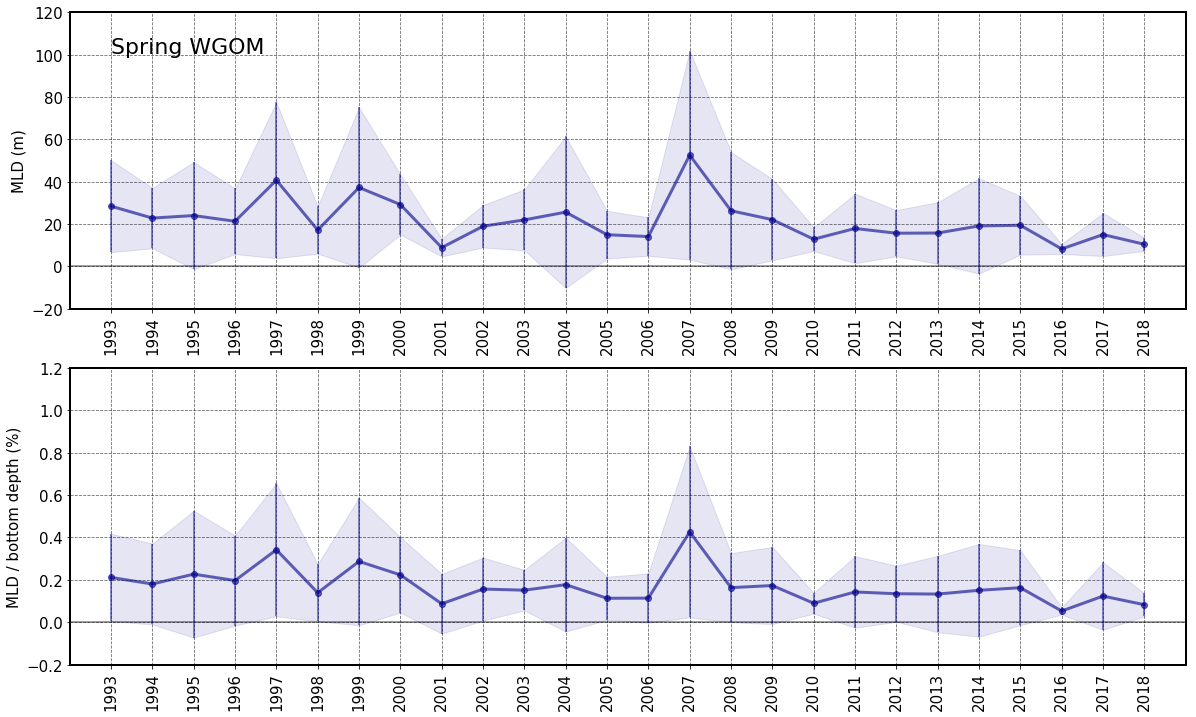

In [252]:
plt.figure(figsize=(20,12))
plt.figure(1)

plt.subplot(211)
array_mean = np.asarray(mean_sp_t)
array_std = np.asarray(std_sp_t)
plt.ylim(-20,100)
plt.xlim(1992,2019)
plt.plot(total_years, mean_sp_t, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,mean_sp_t, std_sp_t,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.text(1993, 100.5, 'Spring WGOM', dict(size=22))
# plt.text(1.25, 40.5, '(b)', dict(size=30))

plt.subplot(212)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
array_mean = np.asarray(ratio_mean_sp_t)
array_std = np.asarray(ratio_std_sp_t)
plt.ylim(-0.2,1.2)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean_sp_t, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean_sp_t, ratio_std_sp_t,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD / bottom depth (%)', fontsize = 15)
plt.xticks(total_years, fontsize = 15,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [8]:
# Spring, EGOM
mean_sp_y= [30.037037037037038, 23.08695652173913, 22.4375, 20.023809523809526, 24.828888888888887, 18.868518518518517, 21.672131147540984, 27.78125, 11.129032258064516, 24.34285714285714, 19.90909090909091, 19.678571428571427, 30.9, 17.444444444444443, 41.4, 26.242424242424242, 20.194444444444443, 14.666666666666666, 15.178571428571429, 17.382978723404257, 21.56, 20.791666666666668, 15.854166666666666, 10.06060606060606, 22.0, 15.823529411764707]
std_sp_y= [23.014458388685885, 17.092874293307293, 18.37616918049026, 16.608213824487848, 21.54234715595435, 13.279053737958252, 20.142705071299577, 13.846782963472057, 8.982929816921292, 13.800502800659853, 17.91877910539943, 14.479181042913627, 15.347855441939329, 6.9513299198298, 19.805049861083408, 18.71481393948963, 10.857203047962738, 7.301584164626969, 14.798777872872215, 11.449339275722906, 10.091897740266694, 17.404451458048182, 16.191548185361675, 4.249345004353479, 16.89540012709215, 13.404280677620454]
ratio_mean_sp_y= [0.24134105698989952, 0.16912810328475134, 0.26048570255534964, 0.15517914328148638, 0.19717149938623352, 0.14925588365725326, 0.16849154007082662, 0.1987416757940621, 0.07704945319276175, 0.1888148813505975, 0.14097430785070075, 0.14078875917583475, 0.2166769175598163, 0.10703727482040548, 0.2882497093186917, 0.19360063069775804, 0.14047494596727506, 0.08583772540585703, 0.10316049025358479, 0.09939943151210318, 0.11883912241166168, 0.11940036027988561, 0.09775495246800225, 0.056304753202375074, 0.13557715052743524, 0.12103684692141495]
ratio_std_sp_y= [0.29209551685647267, 0.21690099309534544, 0.3301984497372806, 0.1730591345135412, 0.2186233338638893, 0.1712230644259615, 0.22611469968186115, 0.1738179420659944, 0.07798043859712388, 0.216307909896985, 0.19956798510994725, 0.18164831970297646, 0.22454140200227243, 0.06673690661888783, 0.19094878956172834, 0.21456293349188402, 0.17667001834922927, 0.05689153405888983, 0.18322419489595193, 0.069954643387587, 0.07012874046844363, 0.12809287878697934, 0.14315887961695392, 0.02665329746130005, 0.17282482049019418, 0.22097786374928285]

In [57]:
mean_sp_y= [30.037037037037038, 23.08695652173913, 22.4375, 20.023809523809526, 24.828888888888887, 18.868518518518517, 21.672131147540984, 27.78125, 11.129032258064516, 24.34285714285714, 19.90909090909091, 19.678571428571427, 30.9, 17.444444444444443, 41.4, 26.242424242424242, 20.194444444444443, 14.666666666666666, 15.178571428571429, 17.382978723404257, 21.56, 20.791666666666668, 15.854166666666666, 10.06060606060606, 22.0, 15.823529411764707]
mean_sp_y_plus1= [23.08695652173913, 22.4375, 20.023809523809526, 24.828888888888887, 18.868518518518517, 21.672131147540984, 27.78125, 11.129032258064516, 24.34285714285714, 19.90909090909091, 19.678571428571427, 30.9, 17.444444444444443, 41.4, 26.242424242424242, 20.194444444444443, 14.666666666666666, 15.178571428571429, 17.382978723404257, 21.56, 20.791666666666668, 15.854166666666666, 10.06060606060606, 22.0, 15.823529411764707,30.037037037037038]
mean_sp_y_plus2= [22.4375, 20.023809523809526, 24.828888888888887, 18.868518518518517, 21.672131147540984, 27.78125, 11.129032258064516, 24.34285714285714, 19.90909090909091, 19.678571428571427, 30.9, 17.444444444444443, 41.4, 26.242424242424242, 20.194444444444443, 14.666666666666666, 15.178571428571429, 17.382978723404257, 21.56, 20.791666666666668, 15.854166666666666, 10.06060606060606, 22.0, 15.823529411764707,30.037037037037038,23.08695652173913]





In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_sp_y, mean_sp_y_plus1)
print(p_value)
print(r_value)

0.8041045775570268
-0.051127085633461855


In [58]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_sp_y, mean_sp_y_plus2)
print(p_value)
print(r_value)

0.2990942277657663
0.21173550545807152


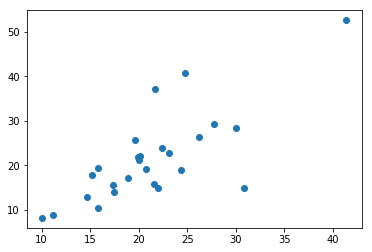

In [11]:
plt.scatter(mean_sp_y,mean_sp_t)

In [12]:
# Spring, GB
mean_sp_w= [19.97860962566845, 23.230563002680967, 32.49598393574297, 44.911764705882355, 37.34467680608365, 39.137328767123286, 36.803030303030305, 38.89795918367347, 31.683333333333334, 37.904761904761905, 29.15068493150685, 32.160714285714285, 32.90909090909091, 33.06666666666667, 36.15873015873016, 44.310810810810814, 34.27450980392157, 35.589285714285715, 35.57692307692308, 35.64705882352941, 39.42424242424242, 31.78409090909091, 25.444444444444443, 15.867924528301886, 32.40963855421687, 27.666666666666668]
std_sp_w= [19.30696508363383, 19.779221880086375, 22.49143040588022, 24.70749135325913, 25.076213870555847, 25.203798305590738, 24.883599542083918, 24.109651634926575, 23.234666389303335, 22.652456530100054, 21.610925213233347, 26.395194899365872, 23.27225378306215, 24.068559482352818, 22.773004311500713, 23.77764432429874, 23.409465515899758, 24.036264852535314, 22.118862602770438, 23.671007773150254, 23.64065617587801, 25.557176924601276, 22.272609541822195, 16.556407567509137, 23.601121141726836, 23.131424554755966]
ratio_mean_sp_w= [0.3213659020026894, 0.3821235222399881, 0.5249076315573583, 0.6722872536017656, 0.5603965443015732, 0.5917695663448176, 0.5808296292548167, 0.5824963812002746, 0.41439058781159, 0.6051920167141213, 0.49070287151195113, 0.47801836835899014, 0.5439616878040371, 0.5394189031081491, 0.5511294556924315, 0.6642981875675005, 0.4856161549669297, 0.5494448274300744, 0.5474503489893539, 0.5383790418730386, 0.5860766917264195, 0.49364976826987267, 0.40798280159063194, 0.2952155484864321, 0.48972320525307195, 0.42914708315041683]
ratio_std_sp_w= [0.35033262888901984, 0.36281405227393865, 0.3954456360772957, 0.3839068434346325, 0.39555679217504497, 0.4079904648689766, 0.41378628131576056, 0.41270557565262816, 0.31876589013905465, 0.39823955254067345, 0.4059827625491937, 0.4237467664331497, 0.40439666261179097, 0.4256310365175184, 0.40842205972246876, 0.4028988011017738, 0.4076955690021889, 0.4094622856468773, 0.4086998299200205, 0.4181679604999142, 0.41509068041405767, 0.43898122691531316, 0.41418395947384423, 0.38249542393123187, 0.414920121738149, 0.4053790421898566]

In [13]:
# Spring, SMAB
mean_sp_v= [19.72222222222222, 29.948275862068964, 27.0, 22.764705882352942, 17.948275862068964, 26.745454545454546, 29.476190476190474, 35.32608695652174, 24.392857142857142, 30.607843137254903, 15.6, 21.307692307692307, 22.88888888888889, 19.863636363636363, 37.270270270270274, 23.130434782608695, 18.71794871794872, 16.058333333333334, 21.602272727272727, 20.754716981132077, 37.69387755102041, 33.10526315789474, 19.88235294117647, 20.805194805194805, 25.14864864864865, 21.680555555555557]
std_sp_v= [11.176888632628172, 24.245456320716304, 24.522537362795013, 14.90964714051514, 9.1753463033266, 18.33646955393757, 15.222536699997358, 41.43830109610635, 19.87611503739078, 22.728645164950276, 14.845874847916509, 18.201371949070275, 16.318492880059214, 13.166056407380081, 27.599597185318103, 12.923871905445186, 17.02930915073234, 17.024636967902982, 18.680045121567602, 15.704711059048561, 28.976559197457895, 30.075743102646058, 15.489967732245953, 17.023314006598298, 23.2156066055949, 16.391754692941824]
ratio_mean_sp_v= [0.3634754299012763, 0.5503082123014856, 0.46248833293793984, 0.48003355456967484, 0.4077240633167252, 0.43726436639391836, 0.541384464390829, 0.4895525788808763, 0.4176277990765912, 0.5439173333350985, 0.21104106351892785, 0.35816649810034595, 0.38397764850976795, 0.325209695713132, 0.5147887382092341, 0.43467142147029453, 0.3245643998550614, 0.30400172800161585, 0.3784627055853932, 0.3197599075150207, 0.45241015413550034, 0.5151183236082851, 0.38520646003679754, 0.4108082428754682, 0.3525183411179411, 0.327649233572622]
ratio_std_sp_v= [0.2968290231280158, 0.3307233268288112, 0.32455986369096695, 0.3192524608000173, 0.27670399238798, 0.329963910731365, 0.3017021168950993, 0.3854888301069537, 0.3353960867367099, 0.3820204554357179, 0.17540799540816682, 0.3348964825961754, 0.2868371230038671, 0.23423969233613348, 0.30916011540128985, 0.26675328259346737, 0.2649531712205963, 0.3108050253713182, 0.32002826905253434, 0.237404364199791, 0.2992954156476938, 0.36145571567600193, 0.3059372509136815, 0.29963963887931744, 0.2909237186677839, 0.24622227897585766]

In [14]:
# Spring, NMAB
mean_sp_x= [14.724137931034482, 17.83783783783784, 28.36842105263158, 31.5, 28.666666666666668, 35.38636363636363, 25.86842105263158, 18.458333333333332, 28.4, 25.302325581395348, 14.416666666666666, 32.883720930232556, 24.476190476190474, 31.875, 21.791666666666668, 18.104166666666668, 26.875, 15.862745098039216, 22.716666666666665, 21.704545454545453, 34.75757575757576, 21.78787878787879, 22.517241379310345, 13.78688524590164, 20.6, 21.38]
std_sp_x= [7.436612835406564, 12.624543906160266, 14.679776731113666, 20.865465416779553, 18.26209937286164, 25.76750588442995, 12.945576469918368, 10.810793860253229, 23.221541723150082, 19.07090183806871, 10.649400087433198, 25.38650923760408, 15.48922527995647, 11.770593655376945, 17.864021492622786, 13.254306821013145, 22.99626328341194, 11.30333910034455, 16.17620852431812, 16.154902922325228, 18.9449446411538, 17.41691545553654, 15.857383115967263, 9.70062488117091, 18.662261384944753, 12.327027216648789]
ratio_mean_sp_x= [0.24226428177749665, 0.34469934666175517, 0.5006502452688301, 0.5116386901224829, 0.5290247371476761, 0.5214426639462544, 0.4067564606758604, 0.2790380331965576, 0.4027183527681869, 0.42106828507466454, 0.2377715340380202, 0.5133973263918468, 0.37781366069466216, 0.552452924063296, 0.3187254066471424, 0.334123928356907, 0.41300274312922314, 0.2714393065383829, 0.3921386748213942, 0.4364634316867388, 0.5120806675068156, 0.36748848546396967, 0.3808318726310833, 0.24475349713034492, 0.27266383025311286, 0.33373486921636264]
ratio_std_sp_x= [0.1618076955286567, 0.2865428773514428, 0.29224347153930397, 0.2940304623360324, 0.3244315598079577, 0.38992524832555153, 0.2261878670070507, 0.1701624474146916, 0.3118613715612798, 0.34503272193500345, 0.24694065057489725, 0.39912717571640854, 0.27428731479459395, 0.25988379617527657, 0.30428746732882506, 0.2701755982890569, 0.3164720892608912, 0.24138301386946942, 0.28825884600943524, 0.31664900612422897, 0.3080601981991509, 0.29992633442995703, 0.2729452185103726, 0.21936928724792168, 0.2376100055973177, 0.2123960942908425]

In [15]:
# Summer, NMAB
mean_su_x= [7.375, 7.433333333333334, 12.533333333333333, 6.871794871794871, nan, 8.666666666666666, 12.037037037037036, 12.2, 6.625, 7.052631578947368, 7.3, 7.951219512195122, 8.272727272727273, 9.73913043478261, 10.619047619047619, 7.673469387755102, 10.25925925925926, 8.217391304347826, 9.152173913043478, 6.729166666666667, 6.862068965517241, 6.75, nan, 7.428571428571429, 10.666666666666666, 8.666666666666666]
std_su_x= [3.119995993587171, 2.3478122203920444, 5.213657278937908, 4.569573212296506, nan, 4.044200236827494, 9.986959947783323, 9.4424573072903, 1.8666480653835098, 1.637510440642531, 2.0024984394500787, 2.2626470523529987, 4.928413152156292, 3.3129179480954334, 4.2367574132448045, 5.1799761842571295, 6.942048969558455, 3.5134093653629432, 7.503527840736702, 2.4472738517696695, 1.942698761517693, 1.479019945774904, nan, 2.610809554642438, 3.0550504633038935, 3.48010216963685]
ratio_mean_su_x= [0.12384483360865443, 0.14371613843534764, 0.21805833894264254, 0.12028296806261918, nan, 0.11192114088471726, 0.2335252810423084, 0.24591574242963818, 0.12170828754261873, 0.1263675276183111, 0.12642467673921481, 0.12771536266962163, 0.13414260632897254, 0.16766400516755847, 0.20232229328155413, 0.1431290964039542, 0.1955380971930112, 0.14813534412150342, 0.1792684626620059, 0.12197594071768515, 0.1322420754443592, 0.10619845773534298, nan, 0.10306729702958312, 0.23756711621053483, 0.11973144683578868]
ratio_std_su_x= [0.04623490021018045, 0.03992532447102491, 0.10890582858521997, 0.05522460517732465, nan, 0.030258160443759112, 0.23346662452684058, 0.26976176800603846, 0.04040132943015021, 0.05069418017806408, 0.03141925570111058, 0.04764276877939161, 0.07419382400793285, 0.0774844905903515, 0.11307368103012817, 0.15155838640616642, 0.189235210926567, 0.08008435244937256, 0.22669563065379647, 0.13562550587348027, 0.06662143166940357, 0.02067319694698759, nan, 0.04676877176134948, 0.11508209177762029, 0.04057379010778766]

In [16]:
# Summer, SMAB
mean_su_v= [7.512820512820513, 7.904761904761905, 7.761904761904762, 8.0, 8.090909090909092, 7.68, 8.261904761904763, 8.548387096774194, 6.882352941176471, 9.387755102040817, 6.470588235294118, 8.28048780487805, 5.578947368421052, 7.318181818181818, 8.585365853658537, 7.315315315315315, 7.531914893617022, nan, 7.921052631578948, 7.9, 8.89655172413793, nan, 6.090909090909091, 7.928571428571429, 7.5, 6.625]
std_su_v= [2.0862405750572295, 2.644036630838427, 2.9261507610928033, 2.6869149958869096, 4.756900164345865, 2.5724696305301644, 2.803565109688562, 2.311802950602441, 1.8433458371755762, 3.225006416893551, 1.7696010537048614, 3.3650803282692876, 0.815364914991035, 3.2105842520746, 3.1349766386191282, 2.269984251967369, 2.5167613757653187, nan, 2.056844529438856, 2.981610303175115, 3.1496560029596545, nan, 1.443137078762504, 1.7914194577120646, 1.5, 1.4379528272281166]
ratio_mean_su_v= [0.12216333340889111, 0.18021816371389568, 0.13584911911438646, 0.1369566345957527, 0.2968457002217933, 0.12485379870451763, 0.14478694342711554, 0.15048127345146578, 0.11015798925535607, 0.1648378597533251, 0.10999571770150379, 0.12922338275578835, 0.09781600196399323, 0.15337056095040988, 0.16706792186930935, 0.14957070973032405, 0.1600487239169381, nan, 0.1377793612391707, 0.16839368346267045, 0.15863900315933788, nan, 0.19876683978965887, 0.1580454140157699, 0.10164693772516727, 0.1397253988572755]
ratio_std_su_v= [0.04393672251540031, 0.07527621631969378, 0.07808890294850046, 0.04448534795823789, 0.19423425434870506, 0.051649036677113874, 0.06848426623252934, 0.043767364541462433, 0.03555171396491327, 0.07374618177749363, 0.04005252423272556, 0.07384325960921533, 0.038013661813719235, 0.09615659016984622, 0.10603965083473994, 0.06586729258032042, 0.09143308948592341, nan, 0.0796918992161397, 0.11320699639373388, 0.07200277353156606, nan, 0.08716686186666447, 0.08566325684137256, 0.03268142048378796, 0.07867751169185389]

In [17]:
# Summer, GB
mean_su_w= [12.18867924528302, 20.502538071065988, 21.913978494623656, 21.03964757709251, 18.425, 17.808823529411764, 17.97530864197531, 17.208333333333332, 15.531645569620252, 14.786666666666667, 11.25, 18.28409090909091, 15.88888888888889, 20.771929824561404, 16.506493506493506, 16.61764705882353, 25.035087719298247, 17.343434343434343, 17.08955223880597, 14.39344262295082, 15.078947368421053, 11.296296296296296, 17.96, 21.74418604651163, 15.0, 17.96551724137931]
std_su_w= [12.790114997600037, 17.45207341993042, 20.080834448014595, 21.52394867108779, 19.303084598063595, 17.383371042809717, 18.555206456225033, 17.842433425840646, 14.419427333769978, 15.366017339860347, 11.477073419897351, 19.333760429760474, 18.06640699553719, 19.58070796334884, 15.906074455616636, 17.916497008397123, 19.43978399058211, 18.006262443805053, 18.304009301678356, 16.074905285930175, 13.974378018260056, 11.28031656639717, 18.29640401827638, 22.184315665505256, 17.29384061094941, 19.019921966953834]
ratio_mean_su_w= [0.17384876249866774, 0.390822470512784, 0.38473650572217283, 0.3571486795822718, 0.32125292582716797, 0.31419370378287087, 0.3070987636073592, 0.2908771066126334, 0.2700881447036099, 0.2426187188252274, 0.1765933975306968, 0.3193785481162734, 0.26611238113653096, 0.3921770954030537, 0.3070758286352851, 0.29378215112578404, 0.5210775417188921, 0.30030187458767693, 0.30598553941364726, 0.2392063653714999, 0.24115767731057974, 0.17129478429778658, 0.28210212989649447, 0.3478739192772771, 0.18081426937866277, 0.3207592211445348]
ratio_std_su_w= [0.24609626975536694, 0.387386402821387, 0.3823812889113088, 0.3845677157513693, 0.37096569341764746, 0.36774824519676297, 0.35867064705631, 0.34721408012158667, 0.3046541777708626, 0.2990450942597981, 0.23720494077639687, 0.37841371181061617, 0.34889805711634303, 0.41652691469676634, 0.3189020334303005, 0.34956089270041274, 0.4098249068269003, 0.362555682045767, 0.3648713218090469, 0.3264931273349127, 0.31881001056818103, 0.19480665785337978, 0.3759080131686345, 0.38967407772003254, 0.24218414783352438, 0.3872182502767636]

In [18]:
# Summer, WGOM
mean_su_t= [6.742857142857143, 9.875, 8.263157894736842, 7.069767441860465, 7.382352941176471, 7.914285714285715, 8.64864864864865, 10.26923076923077, 7.891891891891892, 9.075, 7.0, 8.642857142857142, 8.75, 10.131578947368421, 8.966666666666667, 9.956521739130435, 8.241379310344827, 9.133333333333333, 10.909090909090908, 6.523809523809524, 9.071428571428571, 7.285714285714286, 11.666666666666666, 8.389830508474576, 7.375, 9.692307692307692]
std_su_t= [2.221233340065921, 8.57959060794861, 3.7814241993023283, 2.5553896424980826, 2.209800441913157, 3.287390876593504, 3.588391314768162, 5.095682126208517, 2.3912428497940175, 3.816985066777181, 2.0, 4.269612609679559, 3.651076162292036, 4.149642043101137, 3.2195582857832465, 8.670180083730097, 4.0313869643242715, 4.096611065529924, 5.212825886120528, 2.1956460730282865, 3.8998953413481994, 2.813959371941744, 6.59123997776173, 3.4494752691227655, 3.276335605520289, 3.255400610692127]
ratio_mean_su_t= [0.0509889785947891, 0.12264771734469157, 0.08096658642132219, 0.07104629545933415, 0.0900300559329681, 0.06918502441320545, 0.07583062032954056, 0.09747221993095177, 0.056290609165975794, 0.0792078438532407, 0.07612707271751197, 0.06443311931800458, 0.06645977378849019, 0.0669471108937822, 0.07070535589546163, 0.10166086044801062, 0.09366150422652743, 0.0648878999459663, 0.08295977139357695, 0.06472039572703732, 0.07095688369644607, 0.09052354791332835, 0.12896972306114943, 0.0738737966782439, 0.06738844692122017, 0.07615026393267181]
ratio_std_su_t= [0.026534103740358923, 0.17143173422708735, 0.057936036407300204, 0.03338635445767117, 0.0485909416512733, 0.04249767044927207, 0.04355729867366884, 0.0893886761428362, 0.030271741333226982, 0.06151653536772426, 0.061678200083644275, 0.030164245040473808, 0.03837294585589908, 0.027603307141112764, 0.044025411713540505, 0.16474509527617007, 0.07310011747902306, 0.021929399935050064, 0.05226419967030002, 0.05515439526545706, 0.03298264020646539, 0.024869464661161887, 0.11796620907999243, 0.04128628645383088, 0.04409186051876298, 0.04842780402949682]

In [19]:
# Summer, EGOM
mean_su_y= [7.25, 7.777777777777778, 9.61111111111111, 14.916666666666666, 8.0, 8.444444444444445, 8.466666666666667, 10.2, 9.714285714285714, 9.030303030303031, 8.692307692307692, 7.695652173913044, 8.6, 9.409090909090908, 8.84, 8.84375, 6.837837837837838, 9.205882352941176, 11.636363636363637, 9.875, 11.875, 8.0, 9.4, 10.55, 10.083333333333334, 7.266666666666667]
std_su_y= [1.8314384146529925, 3.2068599310359587, 4.5232595042966395, 19.79530668281415, 3.912077175374606, 4.505826132442581, 4.022713291078824, 5.912698199637792, 4.766378850546689, 4.018780521236462, 2.5835162498071793, 2.910771339707139, 4.386342439892262, 4.68711086539062, 4.021740916568346, 3.500976426298812, 3.928506445536567, 3.376209254080031, 4.676298599858795, 8.099961419661208, 5.290025992374707, 0.0, 3.5270384177096794, 5.42655507665775, 5.073761479962924, 2.0805982045769644]
ratio_mean_su_y= [0.043646720031001146, 0.07244854031519904, 0.08752073888293513, 0.1734614503379965, 0.08350021286034595, 0.06015222800646048, 0.07260258809723016, 0.07232886519557766, 0.06663323929089093, 0.06847124530762037, 0.06369628361394973, 0.05696457440561108, 0.04842516451654291, 0.04648391796256588, 0.08064283951243825, 0.09914767296543238, 0.06913923764843362, 0.06303868666099577, 0.0566445625952847, 0.0788566394853612, 0.07730453012653028, 0.10526315789473684, 0.08025801732654511, 0.06352021657874658, 0.08436521234410672, 0.057847963515983945]
ratio_std_su_y= [0.031206559152001913, 0.05900514160619841, 0.0955807505405804, 0.25900152125961823, 0.02806497495061257, 0.03173248321933684, 0.04972700548915123, 0.03941629883959381, 0.048467504023807985, 0.040481644451189035, 0.041072573800774385, 0.04165169627419151, 0.035652252202044626, 0.022681763337034734, 0.06766832088467317, 0.06139572313814051, 0.0225585700117991, 0.03273834955922831, 0.020684246419366434, 0.06445223653730446, 0.04714472152098849, 0.0, 0.03443643199760313, 0.036531187743279424, 0.11649573814549963, 0.039199226337706145]

In [20]:
# Fall, EGOM
mean_f_y= [34.205128205128204, 18.428571428571427, 16.692307692307693, 18.2972972972973, 23.166666666666668, 20.390243902439025, 39.976190476190474, 17.971830985915492, 20.013157894736842, 22.41176470588235, 18.52238805970149, 19.438356164383563, 18.873015873015873, 21.273972602739725, 22.629032258064516, 17.783132530120483, 18.216216216216218, 26.866666666666667, 20.85185185185185, 23.373333333333335, 32.46341463414634, 22.350877192982455, 24.05263157894737, 24.64864864864865, 26.833333333333332, 25.333333333333332]
std_f_y= [16.846485576096125, 10.827968320935543, 7.689999653742269, 12.738248139692173, 14.175291492201804, 10.20252969295525, 16.623975937293665, 11.79755504747466, 14.712591654280207, 12.485562596711507, 11.780781476948743, 14.509313306985629, 11.781734670959578, 22.108239506605702, 12.650683866466746, 10.1114848131723, 10.875549405532094, 15.986939113608402, 14.830408459956969, 14.673125850418588, 15.080430803472506, 15.107208954284944, 11.931707797693047, 12.722009479672483, 18.46317656550164, 15.726834816113932]
ratio_mean_f_y= [0.2452442732873191, 0.14517030965604655, 0.11257870830376612, 0.1379120198501389, 0.20116902655671176, 0.14067826988504697, 0.25841497487269444, 0.10720869556608255, 0.10862200880040666, 0.13445717200697616, 0.11606485388539783, 0.12061139126820182, 0.12629252867696786, 0.12868941105948956, 0.1304093432267435, 0.11439649696362202, 0.09858526942095062, 0.16051087644652137, 0.11204551043017563, 0.13453463956822476, 0.1794837125518841, 0.12891640834990603, 0.1325740736040404, 0.12836510167894924, 0.16860019169417684, 0.14039791046988204]
ratio_std_f_y= [0.17735565486869959, 0.12270682044548763, 0.07845934302118558, 0.12377702806356512, 0.20680293911487815, 0.09545880954303758, 0.1746831319553493, 0.08550049433204066, 0.09462533685037057, 0.09534851419988126, 0.10588801308428017, 0.12548619365653563, 0.12880070679150465, 0.10345946977555472, 0.08004467051311441, 0.09303278633427553, 0.08981626887359492, 0.1622853477380217, 0.09902532339552132, 0.10160622635701372, 0.11515947188557196, 0.08498568715953307, 0.08211916046174335, 0.07048374783877343, 0.12918428993116518, 0.08549465959651902]

In [21]:
# Fall, WGOM
mean_f_t= [24.728571428571428, 17.654545454545456, 21.08695652173913, 22.32894736842105, 27.844827586206897, 25.55056179775281, 34.82857142857143, 20.373493975903614, 17.919708029197082, 20.857142857142858, 19.407894736842106, 26.06896551724138, 16.5, 15.629139072847682, 21.47328244274809, 19.41780821917808, 20.342105263157894, 28.04225352112676, 16.07179487179487, 17.656976744186046, 36.975, 30.39189189189189, 26.84285714285714, 27.431372549019606, 23.875, 27.347826086956523]
std_f_t= [10.87450679153697, 9.281884961027693, 11.347909378338338, 13.461825321895612, 13.765025300448876, 13.60437077481959, 15.575595772665304, 12.432672505276477, 13.621611421743465, 13.715029741722274, 10.88235852868368, 15.173928868972927, 10.4605168989445, 8.58430409190216, 11.632626034658331, 13.293708909328496, 11.483648900027164, 17.676224677948188, 10.455030655584157, 11.014990216272345, 21.692726315518758, 23.398323783557753, 13.098130416519881, 14.495780186459383, 13.176091036418958, 17.460785120183814]
ratio_mean_f_t= [0.2228438303894586, 0.14712440641282443, 0.18116278148400247, 0.1854985467227604, 0.22485186335972873, 0.2030822248247731, 0.2667318372944598, 0.18969331244840668, 0.13861166478311684, 0.15683270983886002, 0.13173170706173754, 0.1881051342176143, 0.12500034061133877, 0.11790461274543794, 0.16493479859215107, 0.14998549649989223, 0.14908057911226882, 0.19290449072620408, 0.10291820455486976, 0.13516099946303822, 0.2796416366806477, 0.2243911037533572, 0.19415968645613615, 0.20029308569263798, 0.19802536977990615, 0.1942885677530892]
ratio_std_f_t= [0.1582684127801346, 0.11193632666022967, 0.18156355746534228, 0.1871594292736711, 0.17637184389728444, 0.11482325177759724, 0.15119678363100375, 0.20144084128256215, 0.1370672045602137, 0.1484972708367523, 0.09970565480267327, 0.16279781513243877, 0.10490139834094314, 0.091537759134649, 0.11238480455135066, 0.15076936287227932, 0.1302093204617191, 0.15370871369092853, 0.07725122771842188, 0.13221328787719797, 0.1886473699630772, 0.1896677218942999, 0.13221411908758715, 0.15190863229836515, 0.1304922508564237, 0.115797066520376]

In [22]:
# Fall, GB
mean_f_w= [30.638655462184875, 37.81481481481482, 27.6875, 22.80246913580247, 33.676923076923075, 28.75862068965517, 37.97014925373134, 22.816091954022987, 29.009174311926607, 25.11392405063291, 20.352, 29.28, 23.74712643678161, 19.064102564102566, 20.50602409638554, 21.628865979381445, 27.973214285714285, 28.7909604519774, 26.032258064516128, 29.182795698924732, 33.475, 28.0, 29.104166666666668, 31.93617021276596, 20.224137931034484, 17.5625]
std_f_w= [18.772289202164373, 19.52403464116498, 20.117525785990683, 19.704245173413412, 19.50629696538467, 20.13858052802406, 18.014065938025052, 16.766502411593816, 20.28444308893717, 17.48995179283667, 15.079127826237164, 20.064934587483705, 18.363017801470356, 14.762512939780033, 14.79935971748819, 15.464838460549933, 19.272231977190735, 18.598533679022534, 18.54228043468087, 17.496510396505794, 18.390877494018603, 19.972202905260325, 17.78077096113164, 20.20891340664833, 15.550854398800704, 14.397491462635658]
ratio_mean_f_w= [0.5525566327800201, 0.596272265795556, 0.43478766816991077, 0.39840922829828246, 0.5599649213616679, 0.48831909932609485, 0.5623873266264492, 0.37547842795666203, 0.48738481441955855, 0.3943055674258679, 0.3654702193110898, 0.5231651303210697, 0.4166900841555258, 0.3120608356362833, 0.3424262132998962, 0.3710218768325458, 0.4397920302298619, 0.47834759086799067, 0.3911670364343491, 0.4384929582324408, 0.4914505095844886, 0.4185303781701618, 0.43121163274620383, 0.401529837297553, 0.29619852790255696, 0.1873717793812888]
ratio_std_f_w= [0.39232070062314817, 0.3688086318254155, 0.39350594178817944, 0.3781346358654131, 0.3834179052782553, 0.39454489630066025, 0.313644626917341, 0.3415885162124026, 0.39384210150713744, 0.3485013211905997, 0.33139583879757445, 0.4006942162998331, 0.3771475289095994, 0.3069088830891751, 0.3311097191531166, 0.353763428896308, 0.3616020713613461, 0.35727649272991785, 0.3435367256271235, 0.34300656998227314, 0.3410936967233577, 0.37424313677280535, 0.34413359013835737, 0.33789978639619894, 0.30119616621387574, 0.20839734009373218]

In [23]:
# Fall, NMAB
mean_f_x= [21.058823529411764, 13.814814814814815, 25.03846153846154, 14.764705882352942, 18.4, 22.404255319148938, 22.52173913043478, 21.68, 13.921052631578947, 28.022222222222222, 13.2, 19.736842105263158, 20.833333333333332, 15.50943396226415, 19.1, 23.725806451612904, 20.324675324675326, 25.646153846153847, 19.770833333333332, 19.593220338983052, 23.51923076923077, 26.306122448979593, 19.603448275862068, 25.58695652173913, 26.434782608695652, 23.170212765957448]
std_f_x= [13.184083934963105, 8.151514456140614, 12.837687214516153, 9.449739565441542, 10.063228678141595, 13.43488563795855, 11.704215387841705, 13.61828182995197, 9.639233369132546, 21.00950989844455, 8.321057625085889, 13.01958890636946, 13.817762320851939, 10.764411387056422, 12.0867696263311, 15.305669785260697, 11.230109757002655, 14.429063373015076, 15.17569271254382, 12.323490926375841, 13.036178039203916, 12.949200718589251, 11.882963253986796, 13.332823320428492, 13.596118649969387, 12.50245788420101]
ratio_mean_f_x= [0.45212943350220575, 0.28185826165325795, 0.5576051369291471, 0.31020801755282157, 0.3598261430327594, 0.36342681875318017, 0.3723051738740843, 0.35354671395040893, 0.23370690098760502, 0.429854602274298, 0.22761471038598613, 0.3316861272306015, 0.35496928539735323, 0.29356714309178367, 0.34560147311678796, 0.40702941662451375, 0.3307307276585749, 0.4524345323128183, 0.38127691411800235, 0.31571011750561634, 0.3724493507183818, 0.41274388019212044, 0.3316894532749787, 0.3619860864978052, 0.42396532528276804, 0.3982970917057696]
ratio_std_f_x= [0.31879401388071277, 0.2505831226730625, 0.2827767466190701, 0.29158675222579006, 0.2407658897485439, 0.2604879819411791, 0.23892968011434434, 0.269833537208372, 0.20342307662752449, 0.30471410166568624, 0.16630970273261245, 0.28107073853035214, 0.25918286738176244, 0.20920618397341695, 0.24284758262867054, 0.2525266161302942, 0.21927872595665363, 0.32197212018357735, 0.29362138246835595, 0.26514374542555985, 0.2546595069790697, 0.248152794070889, 0.20455143546826243, 0.24357732803500753, 0.2480313276948121, 0.25877244924459564]

In [24]:
# Fall SMAB
mean_f_v= [9.923076923076923, 11.404761904761905, 13.020833333333334, 11.475, 10.783783783783784, 16.82456140350877, 20.20689655172414, 22.333333333333332, 15.615384615384615, 21.602739726027398, 12.205128205128204, 15.661016949152541, 14.661971830985916, 13.578947368421053, 14.43859649122807, 16.421875, 18.37142857142857, 17.197802197802197, 15.485294117647058, 12.564102564102564, 16.271428571428572, 18.67391304347826, 12.0, 7.638888888888889, 26.166666666666668, 12.342465753424657]
std_f_v= [3.921568337394118, 4.771240847937247, 6.838888747856303, 5.953937772600583, 4.521032739798688, 8.786198920710808, 11.302667705686146, 14.481789330818973, 11.408758184553193, 15.207910456045786, 5.034137245256258, 8.131566800244057, 10.046292374706189, 7.314842801301763, 9.688150736690146, 13.921436581200052, 11.416994136025508, 10.012321837429063, 9.813694883500098, 9.800038910950674, 11.90188631936903, 15.226627631748165, 9.11220379845162, 2.8397259040049168, 8.193832368854569, 7.969495228308545]
ratio_mean_f_v= [0.24485702686389835, 0.22031125574026236, 0.44058603644132127, 0.24792916135583046, 0.18017046931158046, 0.3062519554196526, 0.3407849975978513, 0.4280618080263446, 0.30089529741821447, 0.34565319235152936, 0.2013174377855574, 0.3323920331127277, 0.2562132241225164, 0.2849953654522112, 0.3129018262726613, 0.33352300812230834, 0.37462391046474314, 0.38362767866913283, 0.29676009298389805, 0.24304706900045486, 0.3336717633912829, 0.35224267175790047, 0.21782456572218867, 0.11539038368390209, 0.7066136501421422, 0.24539378070236825]
ratio_std_f_v= [0.14995599916715577, 0.14419026243040228, 0.29486668831355767, 0.19490852081293358, 0.11461675318942952, 0.23295117776118826, 0.21378821245679108, 0.3350986848066174, 0.24709028271879213, 0.2646250933581996, 0.12172289304724929, 0.2535076755750928, 0.1873760051374802, 0.23384186561143047, 0.30401276808509287, 0.31720797212173807, 0.28438126059246316, 0.28024244971658335, 0.2599931677514347, 0.20212268407913525, 0.33047413704852097, 0.3119889673139861, 0.14490450621071072, 0.08887254860901178, 0.16282476731885775, 0.23540870382686566]

In [168]:
# x = mean_su_x
# y = total_years
df1 = pd.DataFrame({'x': mean_w_v})
df1['y'] = total_years
df1 = df1.dropna()
x = df1.x
y = df1.y

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f      intercept: %f" % (slope, intercept))
print("r_value: %f    p_value: %f" % (r_value, p_value))
print("std_err: %f " % (std_err))
print('')

df1 = pd.DataFrame({'x': ratio_mean_w_v})
df1['y'] = total_years
df1 = df1.dropna()
x = df1.x
y = df1.y
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f      intercept: %f" % (slope, intercept))
print("r_value: %f    p_value: %f" % (r_value, p_value))
print("std_err: %f " % (std_err))

slope: 0.099286      intercept: 1999.674557
r_value: 0.132760    p_value: 0.555883
std_err: 0.165746 

slope: 6.661180      intercept: 1999.531461
r_value: 0.116146    p_value: 0.606747
std_err: 12.737413 


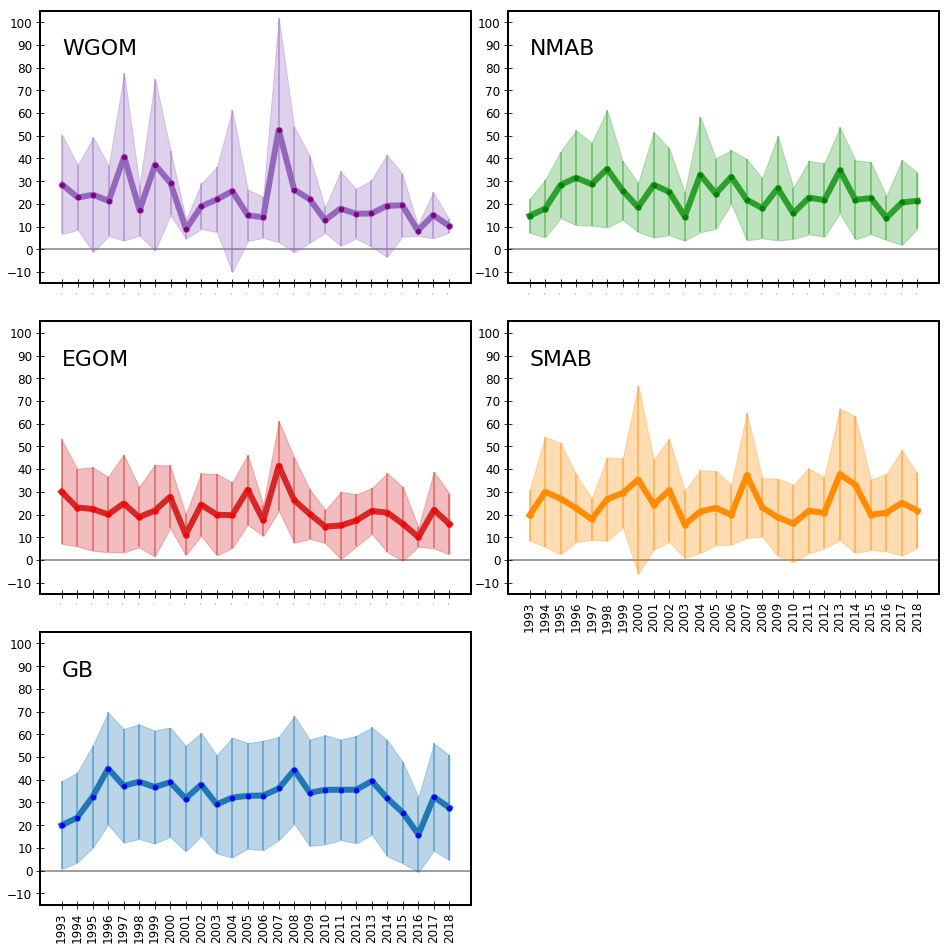

In [386]:
plt.figure(figsize=(13,13))
plt.figure(1)

plt.ylim(-20,120)
plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-15,105)
plt.plot(total_years, mean_sp_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_t, std_sp_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_t) - np.asarray(std_sp_t), np.asarray(mean_sp_t) + np.asarray(std_sp_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_t,color='purple',s=20, alpha = 1, zorder = 60)
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 12) 
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 85.5, 'WGOM', dict(size=22))

plt.subplot(325)
plt.ylim(-15,105)
plt.plot(total_years, mean_sp_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_w, std_sp_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_w) - np.asarray(std_sp_w), np.asarray(mean_sp_w) + np.asarray(std_sp_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_w,color='blue',s=20, alpha = 1, zorder = 60)
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 12) 
plt.xticks(total_years, fontsize = 12,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 85.5, 'GB', dict(size=22))

plt.subplot(323)
plt.ylim(-15,105)
plt.plot(total_years, mean_sp_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_y, std_sp_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_y) - np.asarray(std_sp_y), np.asarray(mean_sp_y) + np.asarray(std_sp_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_y,color='red',s=20, alpha = 1, zorder = 60)
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 12) 
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 85.5, 'EGOM', dict(size=22))

plt.subplot(322)
plt.ylim(-15,105)
plt.plot(total_years, mean_sp_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_x, std_sp_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_x) - np.asarray(std_sp_x), np.asarray(mean_sp_x) + np.asarray(std_sp_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_x,color='green',s=20, alpha = 1, zorder = 60)
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 12) 
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 85.5, 'NMAB', dict(size=22))

plt.subplot(324)
plt.ylim(-15,105)
plt.plot(total_years, mean_sp_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_v, std_sp_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_v) - np.asarray(std_sp_v), np.asarray(mean_sp_v) + np.asarray(std_sp_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_v,color='darkorange',s=20, alpha = 1, zorder = 60)
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 12) 
plt.xticks(total_years, fontsize = 12,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 85.5, 'SMAB', dict(size=22))

# plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)

# plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.ylabel('MLD (m)', fontsize = 15)
# plt.xticks(total_years, fontsize = 15,rotation=90) 
# plt.yticks([-20,0,20,40,60,80,100], fontsize = 15) 
# mpl.rcParams['axes.linewidth'] = 2
# plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.grid(False)
# # plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
# plt.text(1993, 85.5, 'Spring', dict(size=22))
# plt.savefig('seasonal_EGoM')

plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.show()

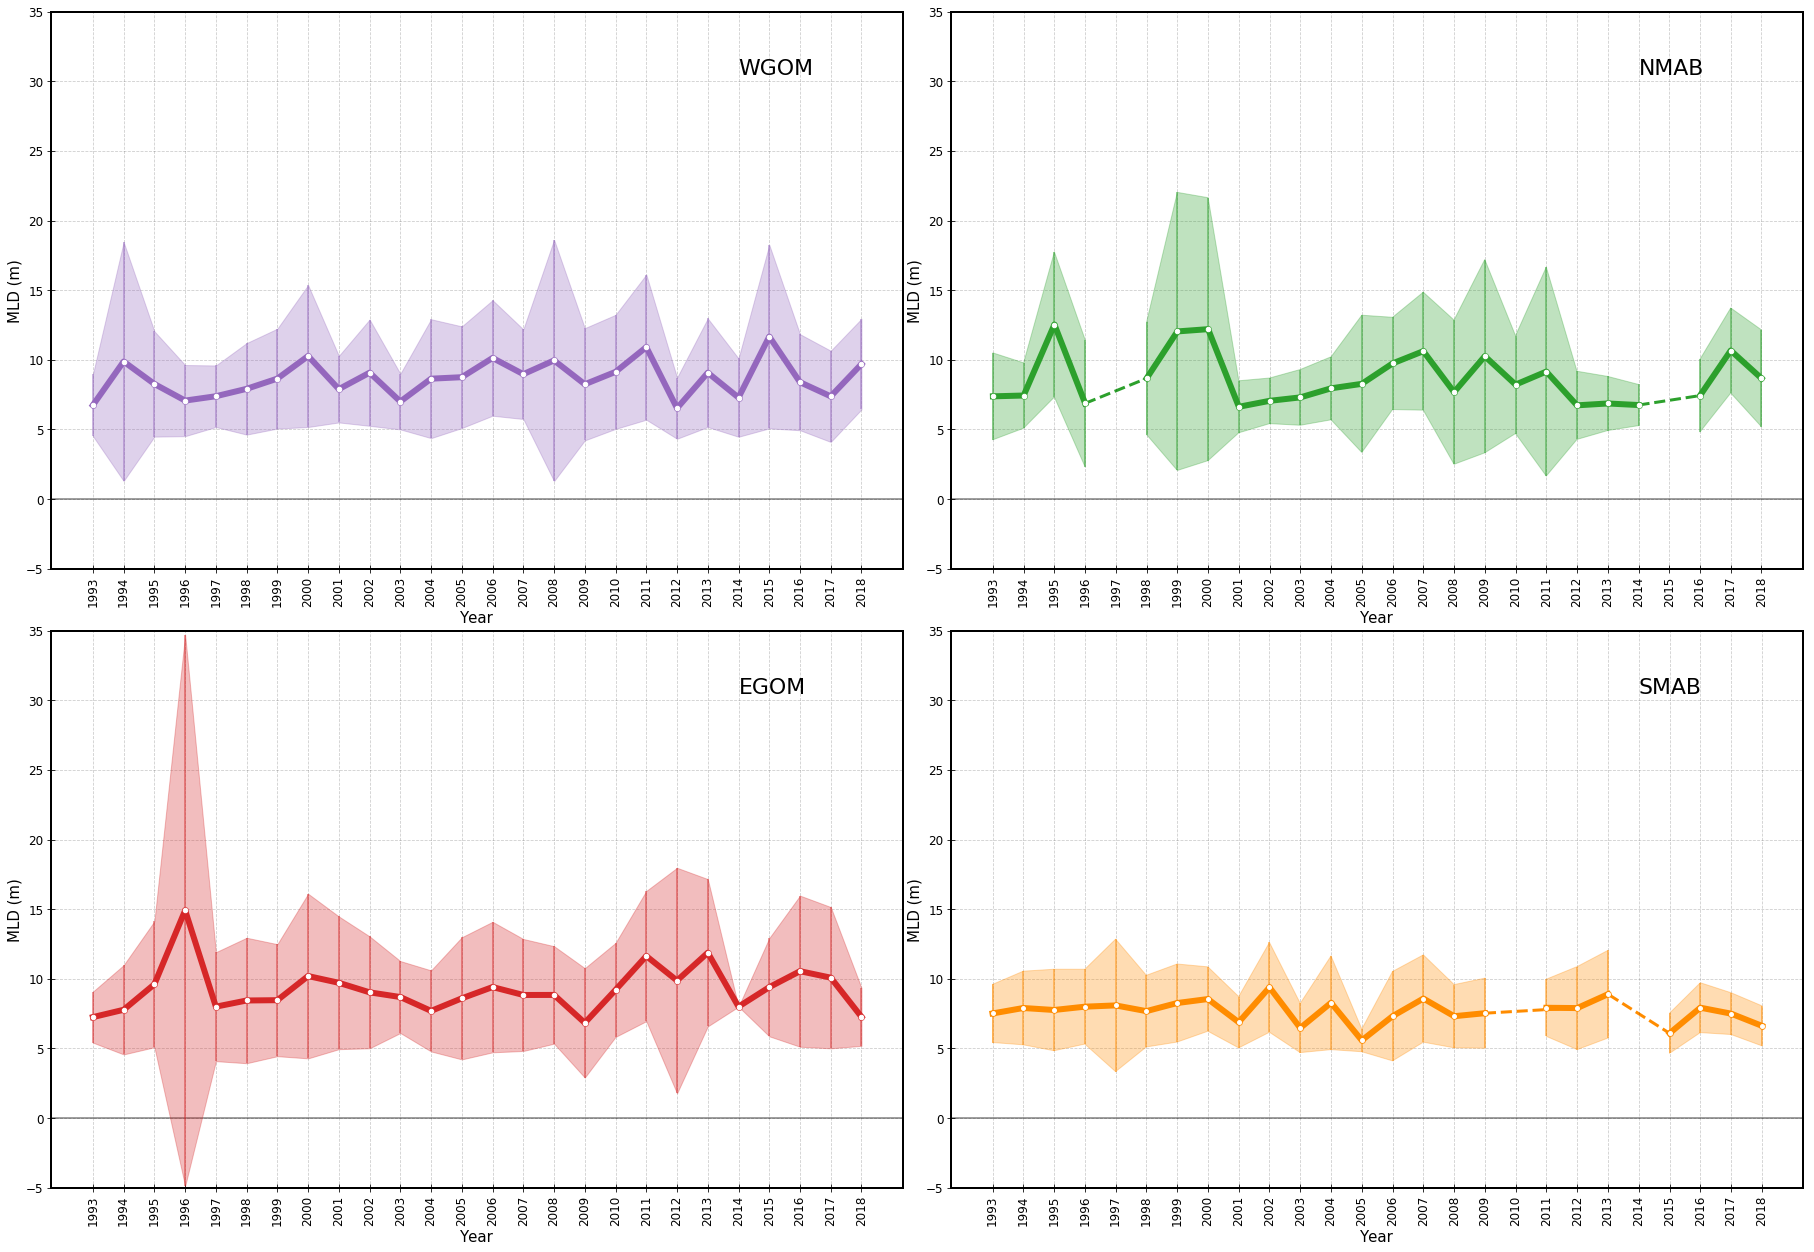

In [460]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-5,35)
plt.plot(total_years, mean_su_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_t, std_su_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_t) - np.asarray(std_su_t), np.asarray(mean_su_t) + np.asarray(std_su_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35], fontsize = 12) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 12,rotation=90) 
plt.text(2014, 30.5, 'WGOM', dict(size=22))
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Year',fontsize=15)
plt.ylabel('MLD (m)',fontsize=15)

# plt.subplot(325)
# plt.ylim(-10,50)
# plt.plot(total_years, mean_su_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
# plt.errorbar(total_years,mean_su_w, std_su_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
# plt.fill_between(total_years, np.asarray(mean_su_w) - np.asarray(std_su_w), np.asarray(mean_su_w) + np.asarray(std_su_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
# plt.scatter(total_years, mean_su_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
# plt.yticks([-10,0,10,20,30,40,50], fontsize = 12) 
# plt.xticks(total_years, fontsize = 12,rotation=90) 
# plt.tick_params(axis="y", direction='inout',length=8)
# plt.tick_params(axis="x", direction='inout',length=8)
# plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
# plt.text(1993, 42.5, 'GB', dict(size=22))

plt.subplot(323)
plt.ylim(-5,35)
plt.plot(total_years, mean_su_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_y, std_su_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_y) - np.asarray(std_su_y), np.asarray(mean_su_y) + np.asarray(std_su_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35], fontsize = 12) 
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 12,rotation=90) 
plt.text(2014, 30.5, 'EGOM', dict(size=22))
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)',fontsize=15)
plt.xlabel('Year',fontsize=15)

plt.subplot(322)
plt.ylim(-5,35)
plt.plot(total_years, mean_su_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_x, std_su_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_x) - np.asarray(std_su_x), np.asarray(mean_su_x) + np.asarray(std_su_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_x,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')

missing = [6.871794871794871, 8.666666666666666]
missingyears= [1996, 1998]
missing2 = [6.75, 7.428571428571429]
missingyears2= [2014,2016]
plt.plot(missingyears, missing, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)
plt.plot(missingyears2, missing2, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 12,rotation=90) 
plt.yticks([-5,0,5,10,15,20,25,30,35], fontsize = 12) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(2014, 30.5, 'NMAB', dict(size=22))
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Year',fontsize=15)
plt.ylabel('MLD (m)',fontsize=15)

plt.subplot(324)
plt.ylim(-5,35)
plt.plot(total_years, mean_su_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_v, std_su_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_v) - np.asarray(std_su_v), np.asarray(mean_su_v) + np.asarray(std_su_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_v,color='white',s=15, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35], fontsize = 12) 
missing = [7.531914893617022, 7.921052631578948, 8.89655172413793, 6.090909090909091]
missingyears= [2009, 2012, 2013, 2015]
plt.plot(missingyears, missing, linestyle='--', color='darkorange', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 12,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(2014, 30.5, 'SMAB', dict(size=22))
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Year',fontsize=15)
plt.ylabel('MLD (m)',fontsize=15)


plt.savefig('seasonal_EGoM')
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.show()

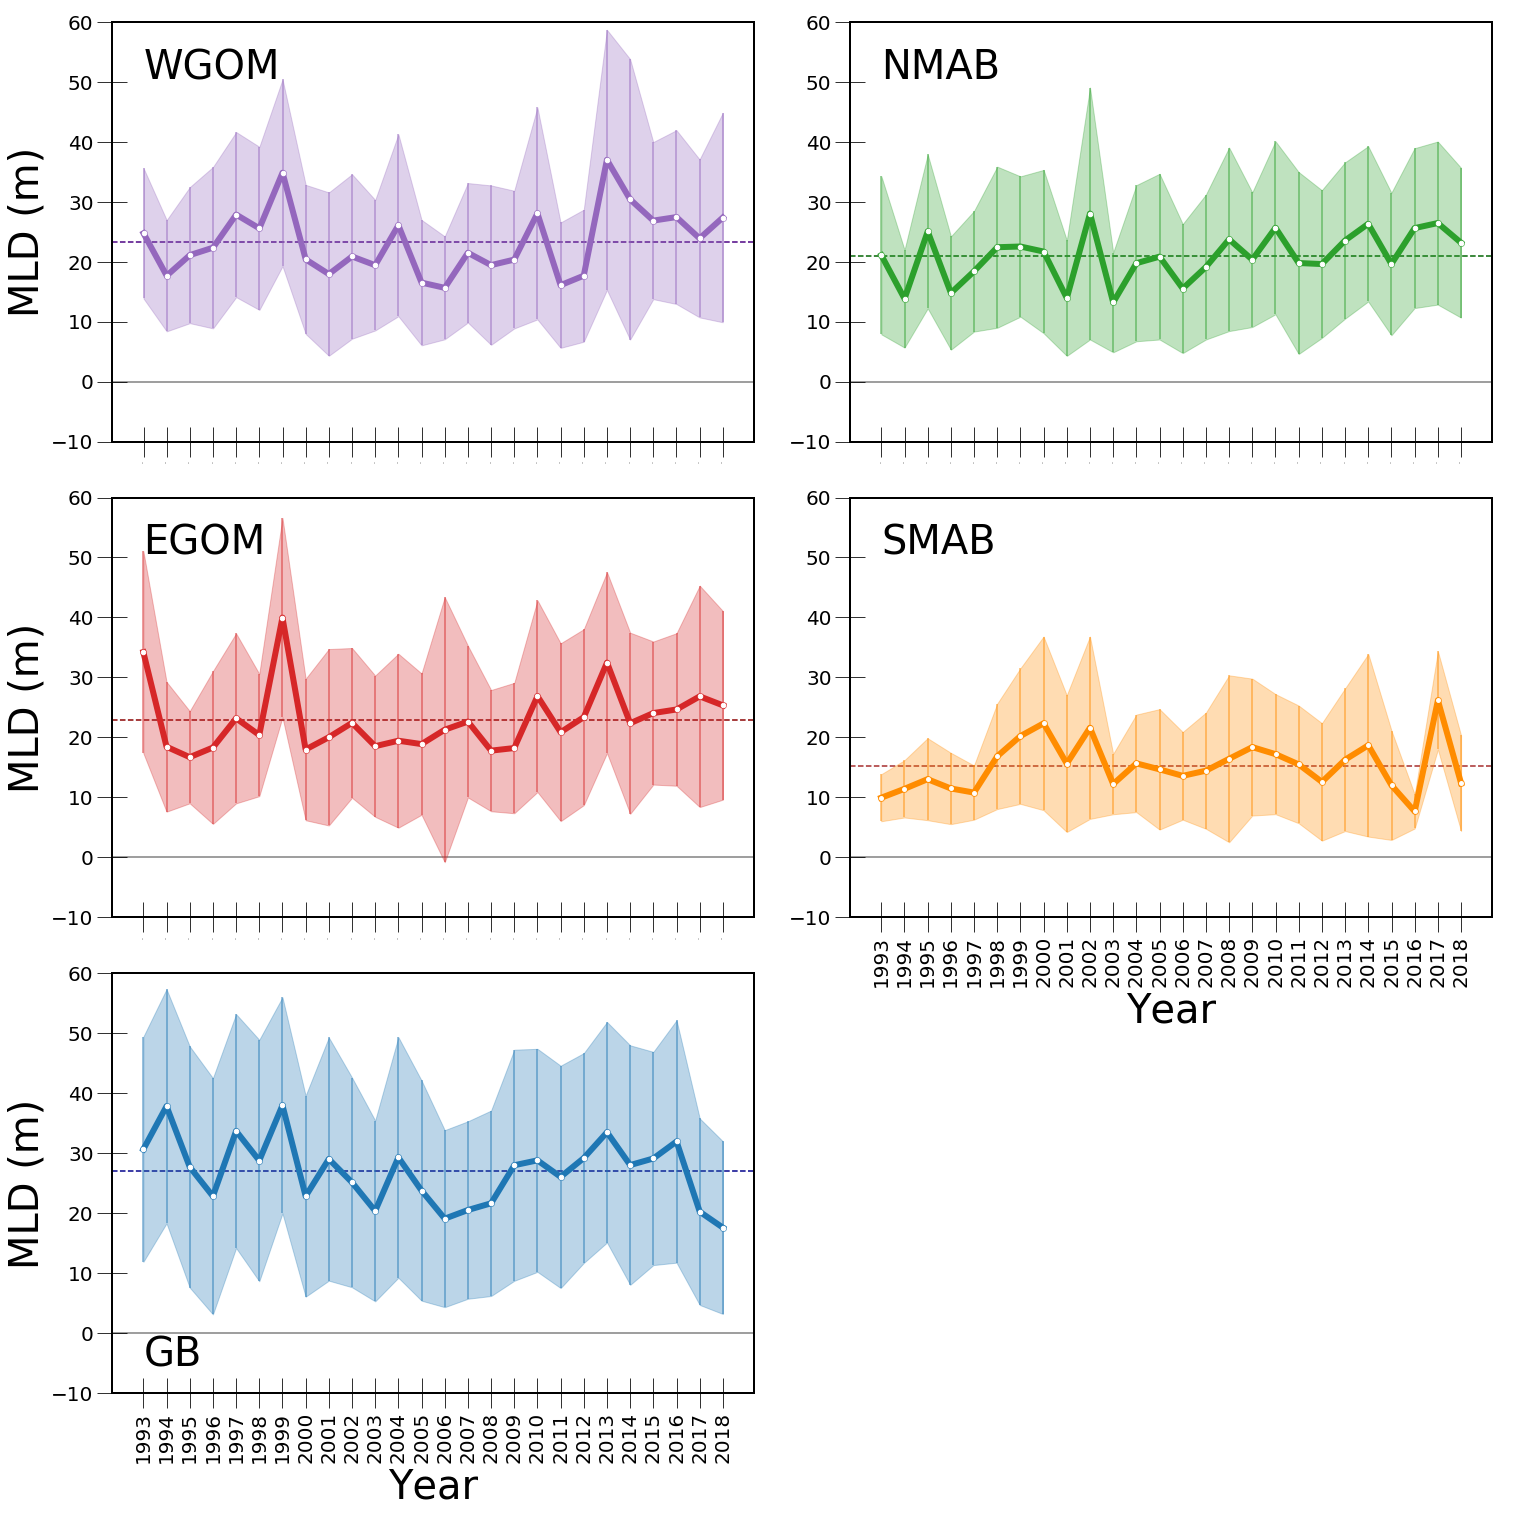

In [513]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-10,60)
plt.plot(total_years, mean_f_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_t, std_f_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_t) - np.asarray(std_f_t), np.asarray(mean_f_t) + np.asarray(std_f_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 50.5, 'WGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_f_t), color='indigo', linestyle='--',alpha = 1)



plt.subplot(325)
plt.ylim(-10,60)
plt.plot(total_years, mean_f_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_w, std_f_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_w) - np.asarray(std_f_w), np.asarray(mean_f_w) + np.asarray(std_f_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60], fontsize = 20) 
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, -5.5, 'GB', dict(size=40))
plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_f_w), color='darkblue', linestyle='--',alpha = 1)



plt.subplot(323)
plt.ylim(-10,60)
plt.plot(total_years, mean_f_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_y, std_f_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_y) - np.asarray(std_f_y), np.asarray(mean_f_y) + np.asarray(std_f_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 50.5, 'EGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_f_y), color='darkred', linestyle='--',alpha = 1)




plt.subplot(322)
plt.ylim(-10,60)
plt.plot(total_years, mean_f_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_x, std_f_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_x) - np.asarray(std_f_x), np.asarray(mean_f_x) + np.asarray(std_f_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_x,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')

# missing = [6.871794871794871, 8.666666666666666]
# missingyears= [1996, 1998]
# missing2 = [6.75, 7.428571428571429]
# missingyears2= [2014,2016]
# plt.plot(missingyears, missing, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)
# plt.plot(missingyears2, missing2, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.yticks([-10,0,10,20,30,40,50,60], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(1993, 50.5, 'NMAB', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
# plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_f_x), color='darkgreen', linestyle='--',alpha = 1)



plt.subplot(324)
plt.ylim(-10,60)
plt.plot(total_years, mean_f_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_v, std_f_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_v) - np.asarray(std_f_v), np.asarray(mean_f_v) + np.asarray(std_f_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_v,color='white',s=15, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60], fontsize = 20) 
# missing = [7.531914893617022, 7.921052631578948, 8.89655172413793, 6.090909090909091]
# missingyears= [2009, 2012, 2013, 2015]
# plt.plot(missingyears, missing, linestyle='--', color='darkorange', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.axhline(y=np.nanmean(mean_f_v), color='brown', linestyle='--',alpha = 1)


plt.text(1993, 50.5, 'SMAB', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Year',fontsize=40)
# plt.ylabel('MLD (m)',fontsize=40)
# plt.tight_layout(pad=15, w_pad=15,h_pad = 15)



plt.savefig('seasonal_EGoM')
plt.show()

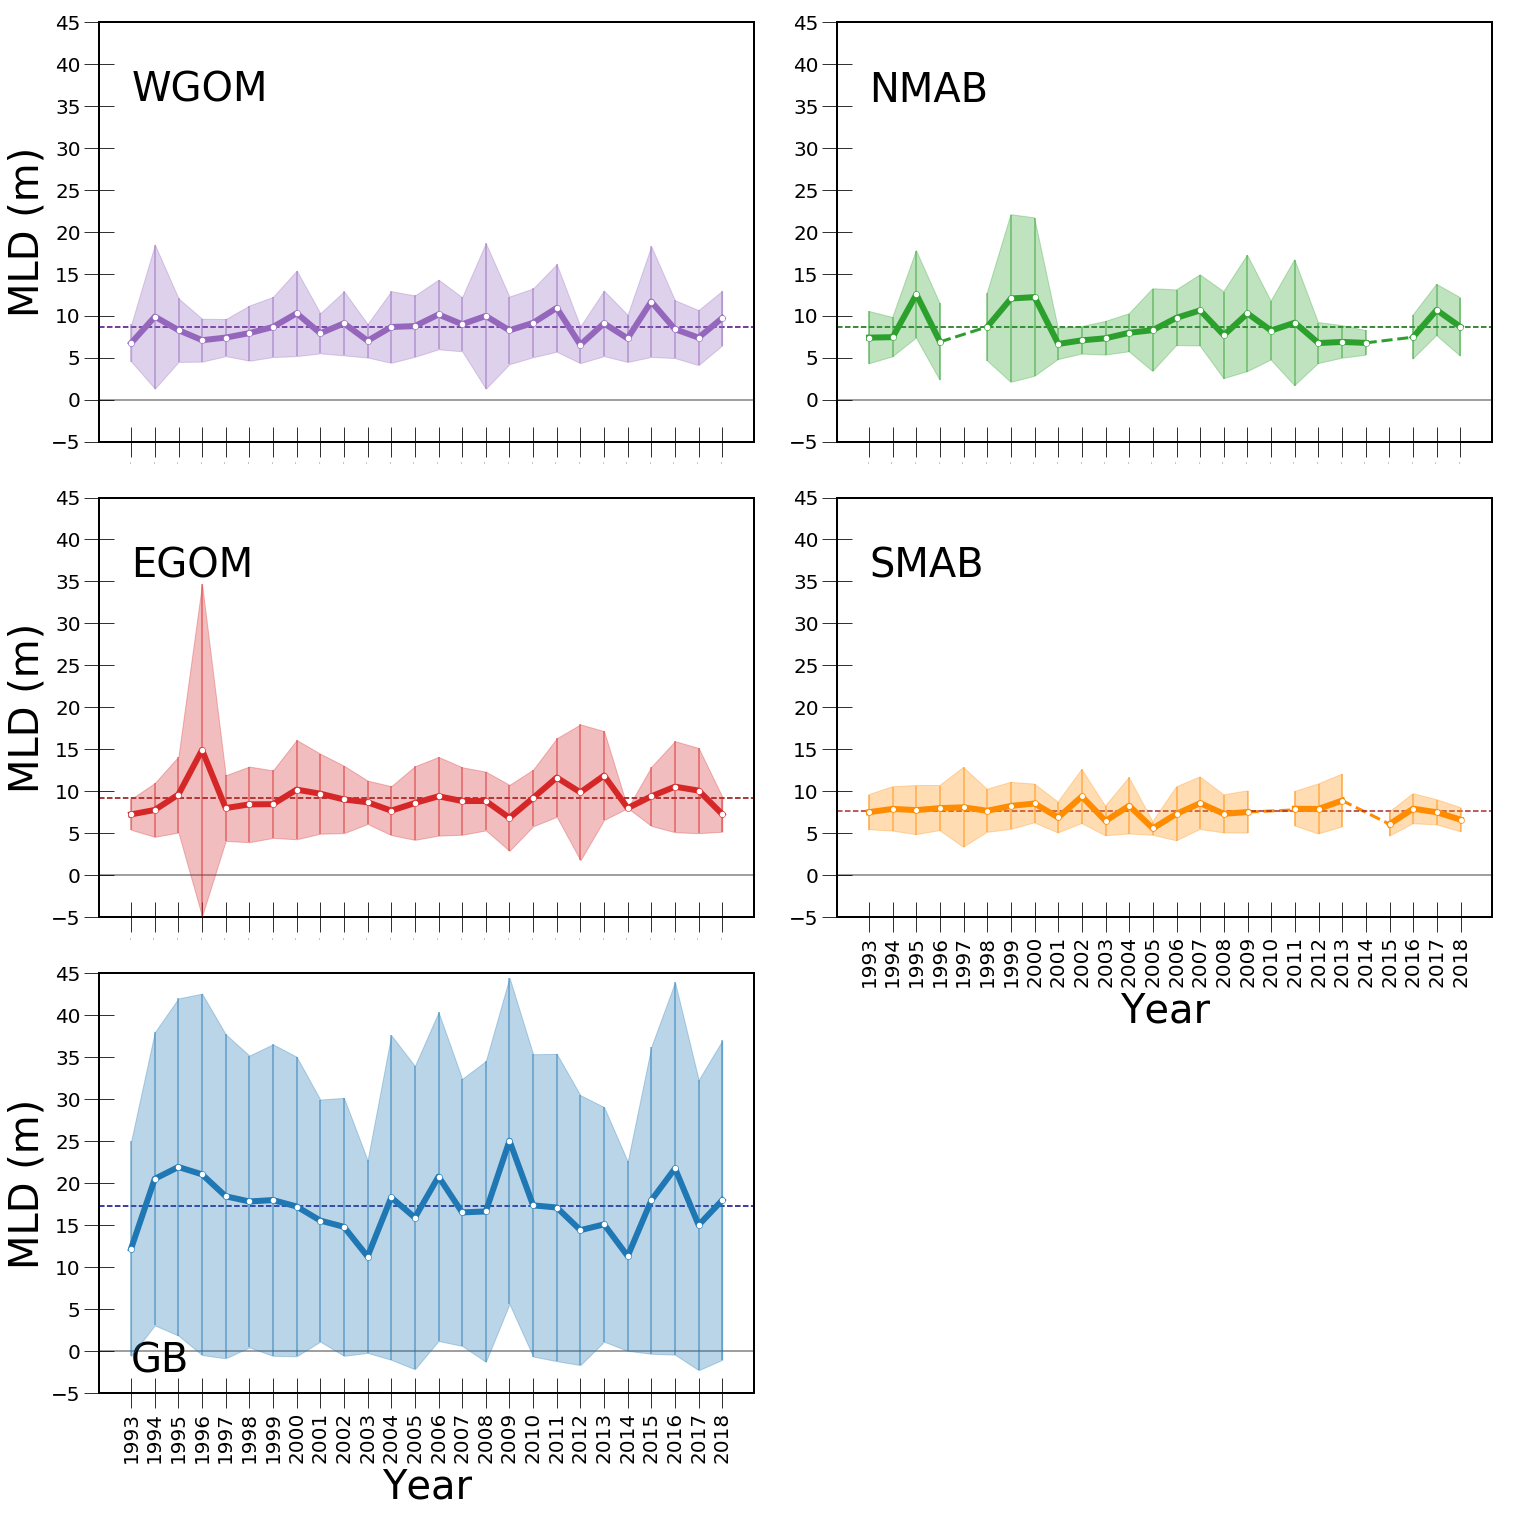

In [534]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-5,45)
plt.plot(total_years, mean_su_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_t, std_su_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_t) - np.asarray(std_su_t), np.asarray(mean_su_t) + np.asarray(std_su_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35,40,45], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 35.5, 'WGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_su_t), color='indigo', linestyle='--',alpha = 1)



plt.subplot(325)
plt.ylim(-5,45)
plt.plot(total_years, mean_su_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_w, std_su_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_w) - np.asarray(std_su_w), np.asarray(mean_su_w) + np.asarray(std_su_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35,40,45], fontsize = 20) 
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, -2.5, 'GB', dict(size=40))
plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_su_w), color='darkblue', linestyle='--',alpha = 1)

plt.subplot(323)
plt.ylim(-5,45)
plt.plot(total_years, mean_su_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_y, std_su_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_y) - np.asarray(std_su_y), np.asarray(mean_su_y) + np.asarray(std_su_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35,40,45], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 35.5, 'EGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_su_y), color='darkred', linestyle='--',alpha = 1)




plt.subplot(322)
plt.ylim(-5,45)
plt.plot(total_years, mean_su_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_x, std_su_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_x) - np.asarray(std_su_x), np.asarray(mean_su_x) + np.asarray(std_su_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_x,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')

missing = [6.871794871794871, 8.666666666666666]
missingyears= [1996, 1998]
missing2 = [6.75, 7.428571428571429]
missingyears2= [2014,2016]
plt.plot(missingyears, missing, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)
plt.plot(missingyears2, missing2, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.yticks([-5,0,5,10,15,20,25,30,35,40,45], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(1993, 35.5, 'NMAB', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
# plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_su_x), color='darkgreen', linestyle='--',alpha = 1)



plt.subplot(324)
plt.ylim(-5,45)
plt.plot(total_years, mean_su_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_su_v, std_su_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_su_v) - np.asarray(std_su_v), np.asarray(mean_su_v) + np.asarray(std_su_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_su_v,color='white',s=15, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-5,0,5,10,15,20,25,30,35,40,45], fontsize = 20) 

missing = [7.531914893617022, 7.921052631578948, 8.89655172413793, 6.090909090909091]
missingyears= [2009, 2012, 2013, 2015]
plt.plot(missingyears, missing, linestyle='--', color='darkorange', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.axhline(y=np.nanmean(mean_su_v), color='brown', linestyle='--',alpha = 1)


plt.text(1993, 35.5, 'SMAB', dict(size=40))
plt.xlabel('Year',fontsize=40)

plt.savefig('seasonal_EGoM')
plt.show()

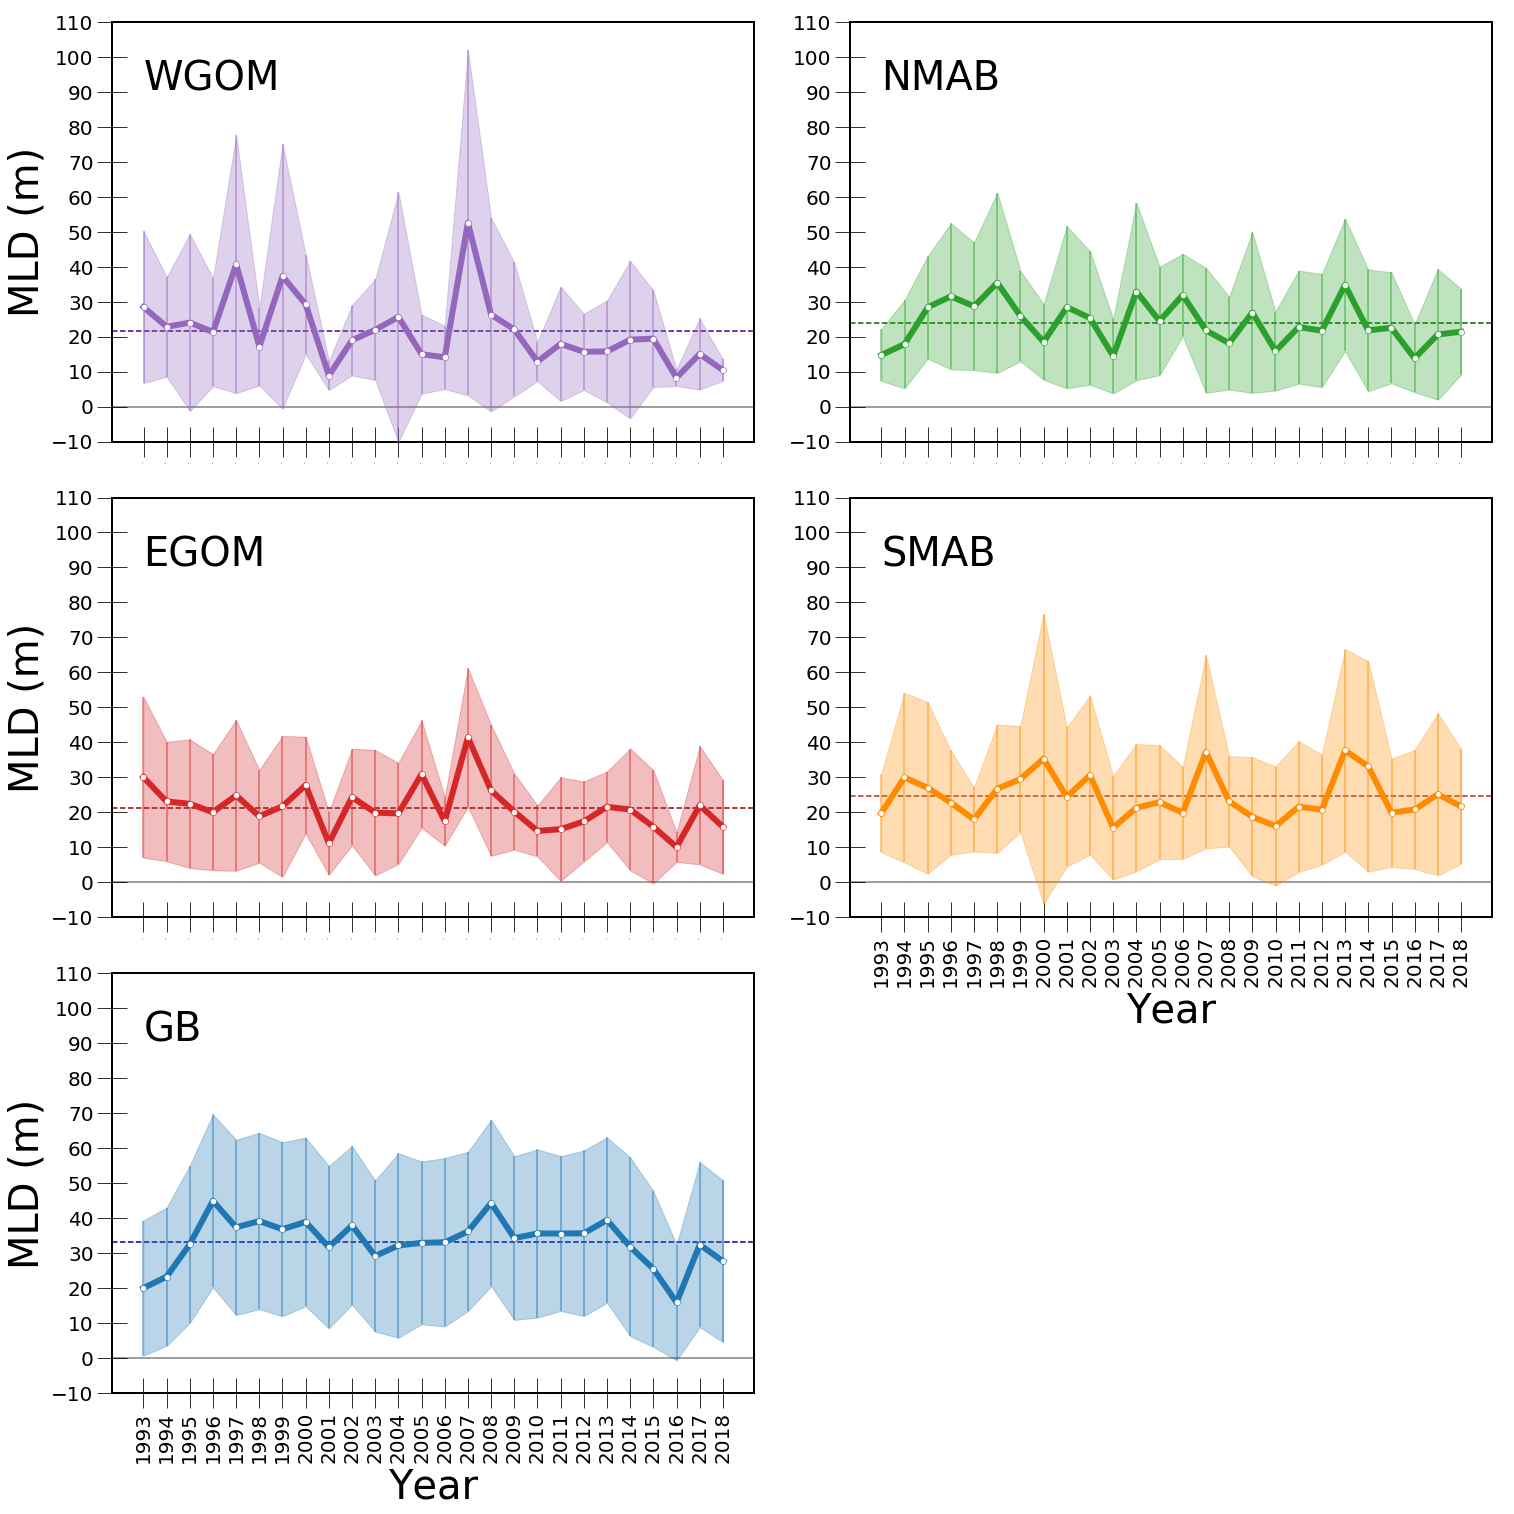

In [543]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_t, std_sp_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_t) - np.asarray(std_sp_t), np.asarray(mean_sp_t) + np.asarray(std_sp_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'WGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_t), color='indigo', linestyle='--',alpha = 1)



plt.subplot(325)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_w, std_sp_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_w) - np.asarray(std_sp_w), np.asarray(mean_sp_w) + np.asarray(std_sp_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 90.5, 'GB', dict(size=40))
plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_w), color='darkblue', linestyle='--',alpha = 1)

plt.subplot(323)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_y, std_sp_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_y) - np.asarray(std_sp_y), np.asarray(mean_sp_y) + np.asarray(std_sp_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'EGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_y), color='darkred', linestyle='--',alpha = 1)


plt.subplot(322)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_x, std_sp_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_x) - np.asarray(std_sp_x), np.asarray(mean_sp_x) + np.asarray(std_sp_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_x,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')

# missing = [6.871794871794871, 8.666666666666666]
# missingyears= [1996, 1998]
# missing2 = [6.75, 7.428571428571429]
# missingyears2= [2014,2016]
# plt.plot(missingyears, missing, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)
# plt.plot(missingyears2, missing2, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 

plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(1993, 90.5, 'NMAB', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
# plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_x), color='darkgreen', linestyle='--',alpha = 1)



plt.subplot(324)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_v, std_sp_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_v) - np.asarray(std_sp_v), np.asarray(mean_sp_v) + np.asarray(std_sp_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_v,color='white',s=15, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 


# missing = [7.531914893617022, 7.921052631578948, 8.89655172413793, 6.090909090909091]
# missingyears= [2009, 2012, 2013, 2015]
# plt.plot(missingyears, missing, linestyle='--', color='darkorange', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.axhline(y=np.nanmean(mean_sp_v), color='brown', linestyle='--',alpha = 1)


plt.text(1993, 90.5, 'SMAB', dict(size=40))
plt.xlabel('Year',fontsize=40)

plt.savefig('seasonal_EGoM')
plt.show()

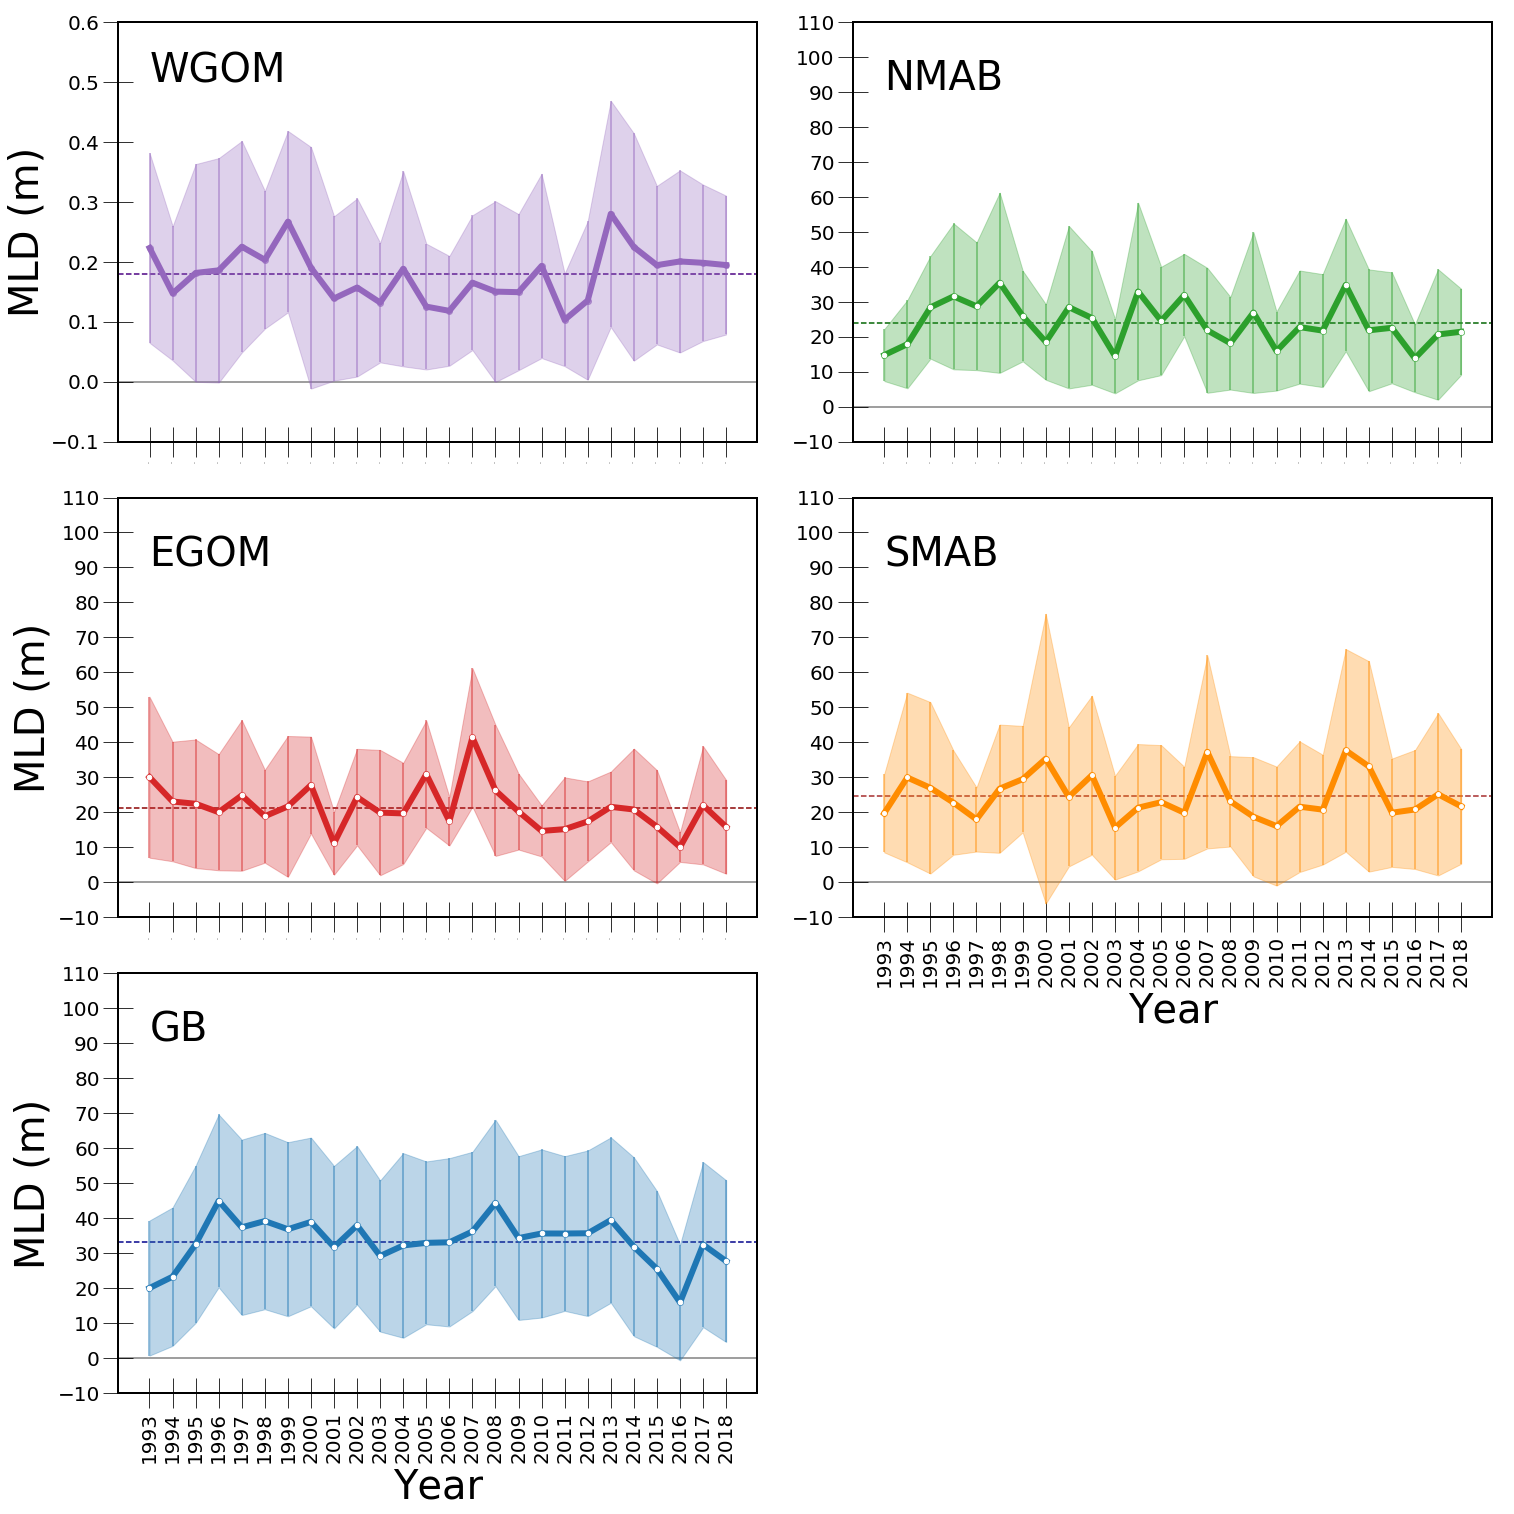

In [556]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-0.1,0.6)
plt.plot(total_years, ratio_mean_f_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,ratio_mean_f_t, ratio_std_f_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(ratio_mean_f_t) - np.asarray(ratio_std_f_t), np.asarray(ratio_mean_f_t) + np.asarray(ratio_std_f_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 0.5, 'WGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(ratio_mean_f_t), color='indigo', linestyle='--',alpha = 1)



plt.subplot(325)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_w, std_sp_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_w) - np.asarray(std_sp_w), np.asarray(mean_sp_w) + np.asarray(std_sp_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(1993, 90.5, 'GB', dict(size=40))
plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_w), color='darkblue', linestyle='--',alpha = 1)

plt.subplot(323)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_y, std_sp_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_y) - np.asarray(std_sp_y), np.asarray(mean_sp_y) + np.asarray(std_sp_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'EGOM', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_y), color='darkred', linestyle='--',alpha = 1)


plt.subplot(322)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_x, std_sp_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_x) - np.asarray(std_sp_x), np.asarray(mean_sp_x) + np.asarray(std_sp_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_x,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')

# missing = [6.871794871794871, 8.666666666666666]
# missingyears= [1996, 1998]
# missing2 = [6.75, 7.428571428571429]
# missingyears2= [2014,2016]
# plt.plot(missingyears, missing, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)
# plt.plot(missingyears2, missing2, linestyle='--', color='tab:green', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 

plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(1993, 90.5, 'NMAB', dict(size=40))
# plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Year',fontsize=40)
# plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_x), color='darkgreen', linestyle='--',alpha = 1)



plt.subplot(324)
plt.ylim(-10,110)
plt.plot(total_years, mean_sp_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_v, std_sp_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_v) - np.asarray(std_sp_v), np.asarray(mean_sp_v) + np.asarray(std_sp_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_v,color='white',s=15, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 


# missing = [7.531914893617022, 7.921052631578948, 8.89655172413793, 6.090909090909091]
# missingyears= [2009, 2012, 2013, 2015]
# plt.plot(missingyears, missing, linestyle='--', color='darkorange', linewidth=3,alpha = 1, zorder= 0)

plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.axhline(y=np.nanmean(mean_sp_v), color='brown', linestyle='--',alpha = 1)


plt.text(1993, 90.5, 'SMAB', dict(size=40))
plt.xlabel('Year',fontsize=40)

plt.savefig('seasonal_EGoM')
plt.show()

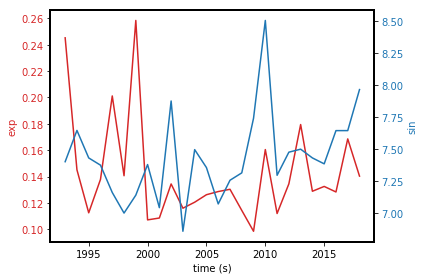

In [614]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(total_years, ratio_mean_f_y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(total_years, fall_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [748]:
fall_mean = [6.589707, 6.858508, 6.9003334, 6.6189437, 6.59399, 6.2390327, 6.935159, 6.746244, 6.3538055, 6.988195, 6.7619348, 6.502483, 7.0086083, 6.6639943, 6.2900314, 7.0812616, 7.3043246, 7.1978474, 6.557177, 6.9812493, 6.7969255, 7.180836, 6.85726, 7.008825, 6.721509, 6.959264]









In [749]:
print(ratio_mean_f_v)
anew = []
for i in ratio_mean_f_v:
    a = i * 100
    anew.append(a)

[0.24485702686389835, 0.22031125574026236, 0.44058603644132127, 0.24792916135583046, 0.18017046931158046, 0.3062519554196526, 0.3407849975978513, 0.4280618080263446, 0.30089529741821447, 0.34565319235152936, 0.2013174377855574, 0.3323920331127277, 0.2562132241225164, 0.2849953654522112, 0.3129018262726613, 0.33352300812230834, 0.37462391046474314, 0.38362767866913283, 0.29676009298389805, 0.24304706900045486, 0.3336717633912829, 0.35224267175790047, 0.21782456572218867, 0.11539038368390209, 0.7066136501421422, 0.24539378070236825]


In [750]:
print(anew)

[24.485702686389835, 22.031125574026238, 44.05860364413213, 24.792916135583045, 18.017046931158045, 30.62519554196526, 34.07849975978513, 42.80618080263446, 30.089529741821448, 34.565319235152934, 20.13174377855574, 33.23920331127277, 25.62132241225164, 28.499536545221122, 31.290182627266127, 33.35230081223084, 37.462391046474316, 38.36276786691328, 29.676009298389804, 24.304706900045485, 33.36717633912829, 35.22426717579005, 21.782456572218866, 11.539038368390209, 70.66136501421421, 24.539378070236825]


In [759]:
fall_mean = [7.6518393, 7.439746, 7.2688174, 7.255583, 7.065282, 7.3193197, 7.4699745, 7.0949917, 7.08194, 7.763503, 6.696739, 7.2696013, 7.3630457, 6.911875, 6.9673877, 7.0114536, 7.082755, 8.094075, 6.9885983, 7.071165, 7.0509567, 7.329148, 7.265823, 7.147867, 7.416394, 7.7595973]






In [765]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = total_years
data2 = mean_f_y
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1068.778, p=0.000
Probably different distributions


In [771]:
from scipy.stats import ttest_rel
data1 = fall_mean
data2 = mean_f_y
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-14.602, p=0.000
Probably different distributions


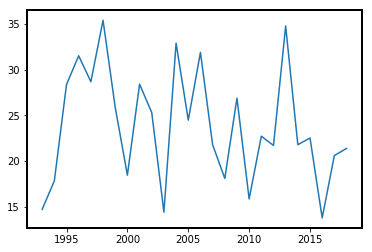

In [786]:
plt.plot(total_years, mean_sp_x)

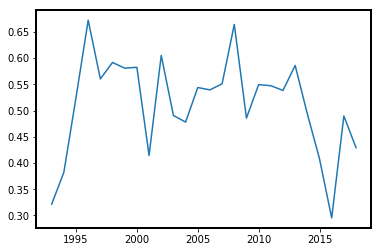

In [776]:
plt.plot(total_years, ratio_mean_sp_w)

In [784]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(total_years, mean_f_y)
print('slope:  ',slope)
# print('r_value:',r_value)
print('p_value:',p_value)
print(r_value)
# print('std_err:',std_err)
print('')

slope:   0.09285840578559514
p_value: 0.5344007329207315
0.12762420989962253



In [794]:
spring_mean = [7.1210737, 7.19806, 6.3826766, 7.396808, 7.6792336, 6.9890494, 7.1507688, 7.347149, 6.897619, 7.185831, 6.788275, 7.0229173, 7.008355, 6.975228, 7.231594, 7.248543, 6.996224, 6.870243, 7.224352, 6.386273, 7.4208574, 7.211266, 6.8436713, 7.0255027, 7.6368375, 7.7327304]



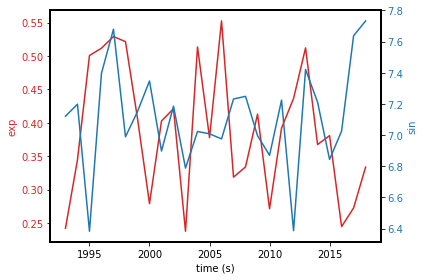

In [790]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(total_years, ratio_mean_sp_x, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(total_years, spring_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

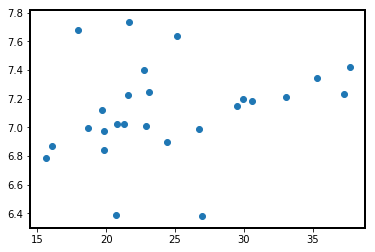

In [796]:
plt.scatter(mean_sp_v,spring_mean)

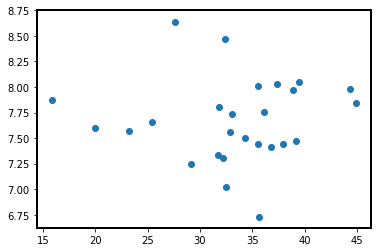

In [798]:
plt.scatter(mean_sp_w,spring_mean)

In [797]:
spring_mean = [7.6003942, 7.568748, 7.021229, 7.8435206, 8.033285, 7.474203, 7.417451, 7.971221, 7.332926, 7.4463634, 7.2457933, 7.3004723, 7.5634103, 7.736435, 7.7526608, 7.9796166, 7.495868, 7.4408584, 8.009202, 6.7323112, 8.050604, 7.808233, 7.6595483, 7.873764, 8.468828, 8.639511]



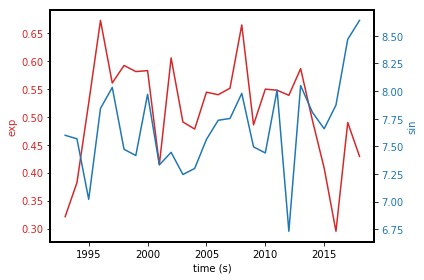

In [792]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(total_years, ratio_mean_sp_w, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(total_years, spring_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [824]:
summer_mean = [4.976861, 5.6386685, 5.519126, 5.010835, 5.225759, 5.406206, 5.9869666, 5.4703975, 5.4582415, 5.4415646, 5.453002, 5.3241043, 4.974813, 5.7096553, 5.5032883, 5.164916, 4.955413, 5.4384913, 5.3299522, 5.3253264, 5.883666, 5.209009, 5.291596, 5.187407, 5.5831065, 5.4179893]














In [825]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(spring_mean, mean_su_v) # ratio_mean_sp_v
# print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
# print('std_err:',std_err)
print('')

r_value: nan
p_value: nan



In [491]:
missing = [6.871794871794871, 8.666666666666666, 6.75, 7.428571428571429]
missingyears= [1996, 1998, 2014,2016]

In [411]:
print(total_years)

[1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [372]:
# plt.scatter(mean_sp_v, mean_sp_t)
# plt.scatter(mean_sp_v, mean_sp_w)
# plt.scatter(mean_sp_v, mean_sp_x)
# plt.scatter(mean_sp_v, mean_sp_y)

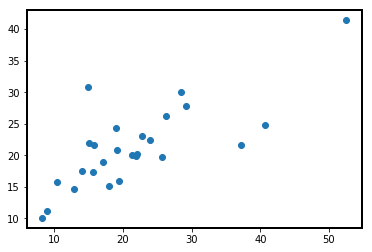

In [370]:
# plt.scatter(mean_sp_t, mean_sp_v)
# plt.scatter(mean_sp_t, mean_sp_w)
# plt.scatter(mean_sp_t, mean_sp_x)
plt.scatter(mean_sp_t, mean_sp_y)

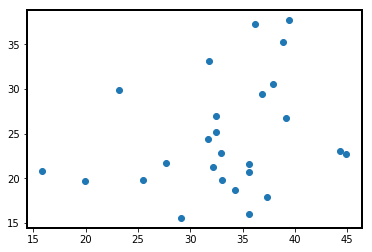

In [376]:
plt.scatter(mean_sp_w, mean_sp_v)
# plt.scatter(mean_sp_w, mean_sp_t)
# plt.scatter(mean_sp_w, mean_sp_x)
# plt.scatter(mean_sp_w, mean_sp_y)

In [682]:
print(ratio_mean_su_v)
anew = []
for i in ratio_mean_su_v:
    a = i * 100
    anew.append(a)
print(anew)

[0.12216333340889111, 0.18021816371389568, 0.13584911911438646, 0.1369566345957527, 0.2968457002217933, 0.12485379870451763, 0.14478694342711554, 0.15048127345146578, 0.11015798925535607, 0.1648378597533251, 0.10999571770150379, 0.12922338275578835, 0.09781600196399323, 0.15337056095040988, 0.16706792186930935, 0.14957070973032405, 0.1600487239169381, nan, 0.1377793612391707, 0.16839368346267045, 0.15863900315933788, nan, 0.19876683978965887, 0.1580454140157699, 0.10164693772516727, 0.1397253988572755]
[12.216333340889111, 18.02181637138957, 13.584911911438645, 13.695663459575268, 29.68457002217933, 12.485379870451762, 14.478694342711554, 15.048127345146579, 11.015798925535607, 16.48378597533251, 10.999571770150379, 12.922338275578834, 9.781600196399323, 15.337056095040987, 16.706792186930937, 14.957070973032405, 16.004872391693812, nan, 13.77793612391707, 16.839368346267044, 15.863900315933787, nan, 19.876683978965886, 15.80454140157699, 10.164693772516726, 13.97253988572755]


In [692]:
summer_mean = [4.976861, 5.6386685, 5.519126, 5.010835, 5.225759, 5.406206, 5.9869666, 5.4703975, 5.4582415, 5.4415646, 5.453002, 5.3241043, 4.974813, 5.7096553, 5.5032883, 5.164916, 4.955413, 5.4384913, 5.3299522, 5.3253264, 5.883666, 5.209009, 5.291596, 5.187407, 5.5831065, 5.4179893]




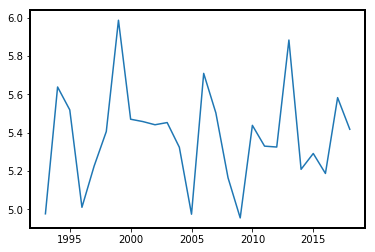

In [697]:
plt.plot(total_years, summer_mean)

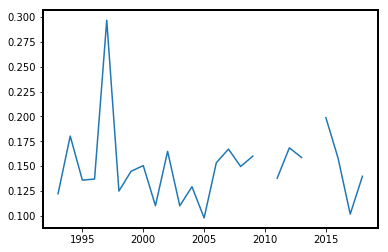

In [698]:
plt.plot(total_years, ratio_mean_su_v)

In [862]:
summer_mean = [5.358516, 5.757827, 5.754369, 5.1696763, 5.533973, 5.312524, 5.9150133, 5.5611753, 5.526255, 5.749743, 5.554248, 5.4768376, 5.3620667, 5.9435434, 5.7577105, 5.0304923, 5.255664, 5.5696416, 5.236903, 5.2148113, 5.986355, 5.315807, 5.378638, 5.4480696, 5.6191144, 5.4780993]











-0.010823681681743982
-0.07635971277509883
0.7228644989483843


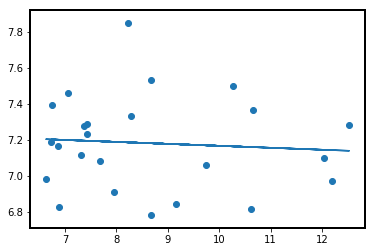

In [863]:
df1 = pd.DataFrame({'x': mean_su_x})
df1['y'] = fall_mean
df1 = df1.dropna()
x = df1.x
y = df1.y

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
fit = slope*x + intercept
print(slope)
print(r_value)
print(p_value)

# plt.plot(x, y)
plt.scatter(x, y)
plt.plot(x, fit)
plt.show()

In [148]:
from numpy import cov; from scipy.stats import pearsonr
x = df1.x
y = df1.y
covariance = cov(x, y)
print(covariance)
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

[[126.010825   -20.08025617]
 [-20.08025617  41.91259521]]
Pearsons correlation: -0.276


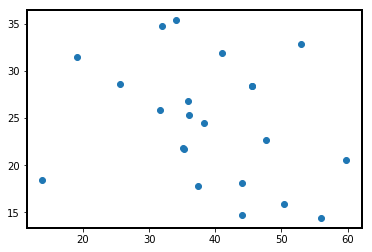

In [128]:
plt.scatter(mean_w_x,mean_sp_x)
plt.show()

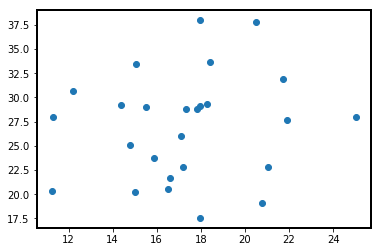

In [122]:
plt.scatter(mean_su_w,mean_f_w)
plt.show()

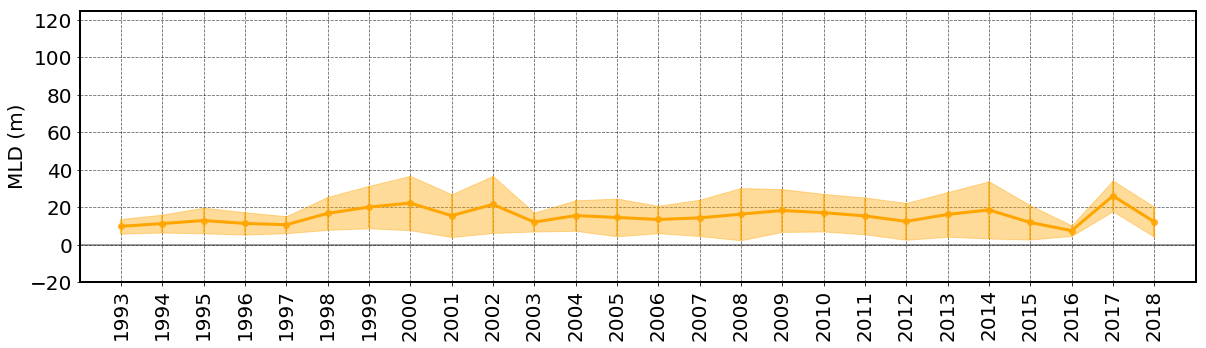

In [173]:
import numpy as np; import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.figure(1)

array_mean_f_v = np.asarray(mean_f_v) #Orange
array_std_f_v = np.asarray(std_f_v)

array_mean_f_w = np.asarray(mean_f_w) #Blue
array_std_f_w = np.asarray(std_f_w)

array_mean_f_t = np.asarray(mean_f_t) #Purple
array_std_f_t = np.asarray(std_f_t)

array_mean_f_y = np.asarray(mean_f_y) #Red
array_std_f_y = np.asarray(std_f_y)

array_mean_f_x = np.asarray(mean_f_x) #Green
array_std_f_x = np.asarray(std_f_x)

plt.ylim(-20,125)
plt.xlim(1992,2019)
plt.plot(total_years, mean_f_v, linestyle='-', color='orange', linewidth=3,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_v, std_f_v,linestyle='None', marker='o',color='orange',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean_f_v - array_std_f_v, array_mean_f_v + array_std_f_v,color = 'orange', alpha = 0.4,zorder = 30)

# plt.plot(total_years, mean_f_w, linestyle='-', color='blue', linewidth=3,alpha = 0.6, zorder= 30)
# plt.errorbar(total_years,mean_f_w, std_f_w,linestyle='None', marker='o',color='blue',alpha= 0.6, markersize=6, zorder = 30)
# plt.fill_between(total_years, array_mean_f_w - array_std_f_w, array_mean_f_w + array_std_f_w,color = 'blue', alpha = 0.1,zorder = 30)

# plt.plot(total_years, mean_f_t, linestyle='-', color='purple', linewidth=3,alpha = 0.6, zorder= 30)
# plt.errorbar(total_years,mean_f_t, std_f_t,linestyle='None', marker='o',color='purple',alpha= 0.6, markersize=6, zorder = 30)
# plt.fill_between(total_years, array_mean_f_t - array_std_f_t, array_mean_f_t + array_std_f_t,color = 'purple', alpha = 0.1,zorder = 30)

# plt.plot(total_years, mean_f_v, linestyle='-', color='orange', linewidth=3,alpha = 0.6, zorder= 30)
# plt.errorbar(total_years,mean_f_v, std_f_v,linestyle='None', marker='o',color='orange',alpha= 0.6, markersize=6, zorder = 30)
# plt.fill_between(total_years, array_mean_f_v - array_std_f_v, array_mean_f_v + array_std_f_v,color = 'orange', alpha = 0.1,zorder = 30)

# plt.plot(total_years, mean_f_v, linestyle='-', color='orange', linewidth=3,alpha = 0.6, zorder= 30)
# plt.errorbar(total_years,mean_f_v, std_f_v,linestyle='None', marker='o',color='orange',alpha= 0.6, markersize=6, zorder = 30)
# plt.fill_between(total_years, array_mean_f_v - array_std_f_v, array_mean_f_v + array_std_f_v,color = 'orange', alpha = 0.1,zorder = 30)




plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

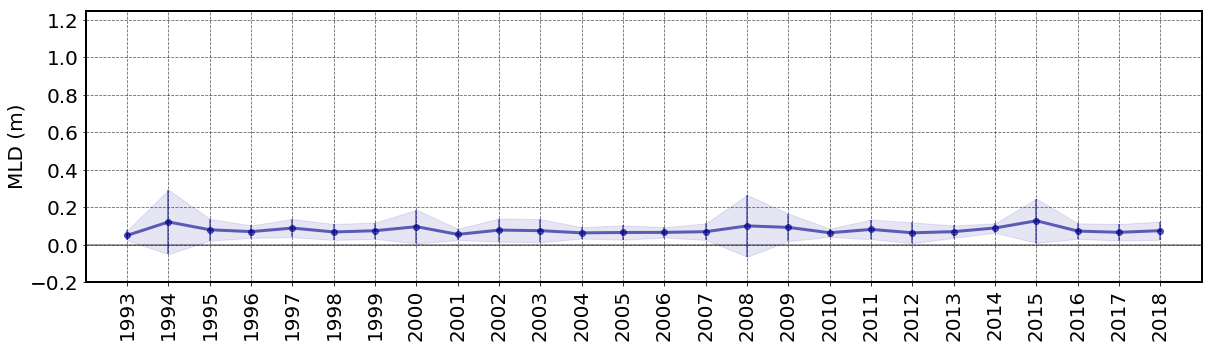

In [83]:
import numpy as np; import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.figure(1)

array_mean = np.asarray(ratio_mean)
array_std = np.asarray(ratio_std)

plt.ylim(-0.2,1.25)
plt.xlim(1992,2019)
plt.plot(total_years, ratio_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(total_years,ratio_mean, ratio_std,linestyle='None', marker='o',color='darkblue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, array_mean - array_std, array_mean + array_std,color = 'darkblue', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.show()

In [950]:
ratio_mean_f_x = [100 * i for i in ratio_mean_f_x]
ratio_std_f_x = [100 * i for i in ratio_std_f_x]

In [958]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(total_years, mean_f_x) # ratio_mean_sp_v
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print(intercept)
# print('std_err:',std_err)
print('')

slope:   0.21729685992466002
r_value: 0.3968560588551802
p_value: 0.04471241906316035
-414.8778092268092



In [923]:
print(ratio_mean_sp_y)
print(ratio_std_sp_y)

[24.134105698989952, 16.912810328475132, 26.048570255534965, 15.517914328148638, 19.71714993862335, 14.925588365725325, 16.84915400708266, 19.874167579406212, 7.704945319276176, 18.88148813505975, 14.097430785070076, 14.078875917583474, 21.66769175598163, 10.703727482040549, 28.82497093186917, 19.360063069775805, 14.047494596727505, 8.583772540585704, 10.31604902535848, 9.939943151210318, 11.883912241166168, 11.940036027988562, 9.775495246800226, 5.630475320237507, 13.557715052743525, 12.103684692141496]
[29.209551685647266, 21.690099309534546, 33.019844973728055, 17.305913451354122, 21.86233338638893, 17.122306442596148, 22.611469968186114, 17.38179420659944, 7.798043859712387, 21.6307909896985, 19.956798510994727, 18.164831970297644, 22.454140200227243, 6.673690661888783, 19.094878956172835, 21.456293349188403, 17.667001834922928, 5.689153405888983, 18.322419489595195, 6.9954643387587, 7.012874046844362, 12.809287878697933, 14.315887961695392, 2.665329746130005, 17.282482049019418, 2

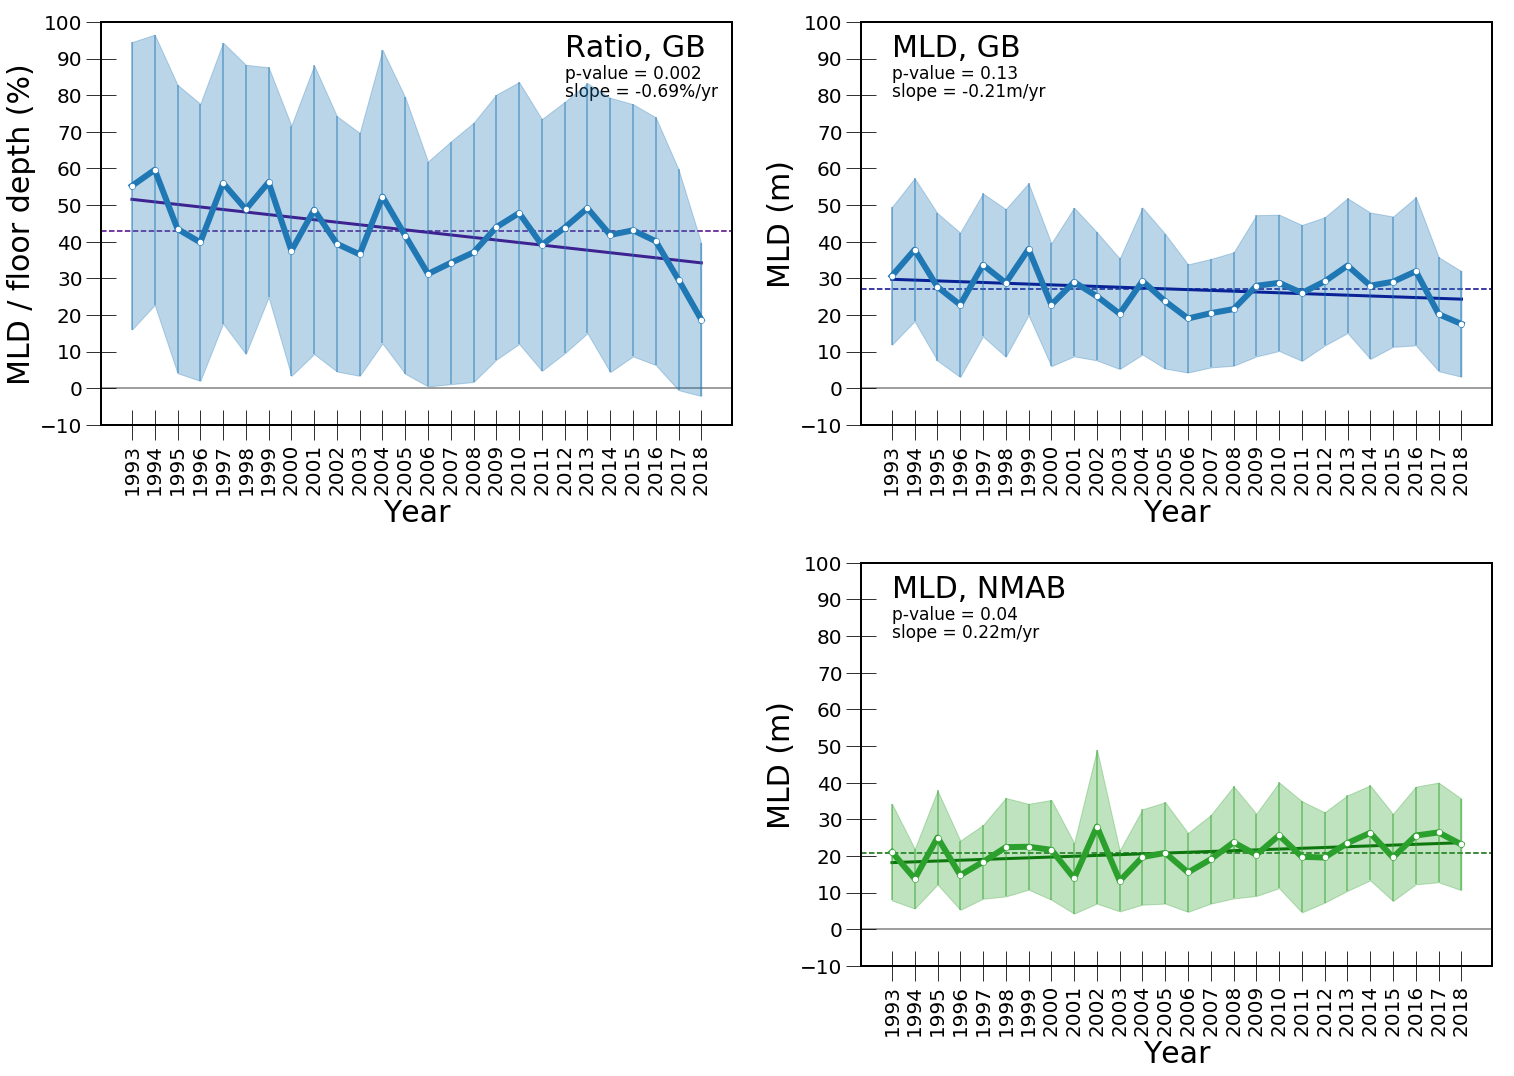

In [962]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-10,100)
plt.plot(total_years, ratio_mean_f_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,ratio_mean_f_w, ratio_std_f_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(ratio_mean_f_w) - np.asarray(ratio_std_f_w), np.asarray(ratio_mean_f_w) + np.asarray(ratio_std_f_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, ratio_mean_f_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(2012, 90.5, 'Ratio, GB', dict(size=30))
plt.plot(x, -0.6934691190042789*x + 1433.6553665960173, color='indigo',linewidth=3)
plt.ylabel('MLD / floor depth (%)',fontsize=30)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(ratio_mean_f_w), color='indigo', linestyle='--',alpha = 1)
plt.text(2012, 84.5, 'p-value = 0.002', dict(size=17))
plt.text(2012, 79.5, 'slope = -0.69%/yr', dict(size=17))
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.xlabel('Year',fontsize=30)

plt.subplot(322)
plt.ylim(-10,100)
plt.plot(total_years, mean_f_w, linestyle='-', color='tab:blue', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_w, std_f_w,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_w) - np.asarray(std_f_w), np.asarray(mean_f_w) + np.asarray(std_f_w),color = 'tab:blue', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_w,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'MLD, GB', dict(size=30))
plt.ylabel('MLD (m)',fontsize=30)
plt.plot(x, -0.2166579192332425*x + 461.55159721988116, color='darkblue',linewidth=3)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_f_w), color='darkblue', linestyle='--',alpha = 1)
plt.text(1993, 84.5, 'p-value = 0.13', dict(size=17))
plt.text(1993, 79.5, 'slope = -0.21m/yr', dict(size=17))
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.xlabel('Year',fontsize=30)

plt.subplot(324)
plt.ylim(-10,100)
plt.plot(total_years, mean_f_x, linestyle='-', color='tab:green', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_f_x, std_f_x,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_f_x) - np.asarray(std_f_x), np.asarray(mean_f_x) + np.asarray(std_f_x),color = 'tab:green', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_f_x,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'MLD, NMAB', dict(size=30))
plt.text(1993, 84.5, 'p-value = 0.04', dict(size=17))
plt.text(1993, 79.5, 'slope = 0.22m/yr', dict(size=17))

plt.plot(x, 0.21729685992466002*x -414.8778092268092, color='darkgreen',linewidth=3)
plt.ylabel('MLD (m)',fontsize=30)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_f_x), color='darkgreen', linestyle='--',alpha = 1)
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.xlabel('Year',fontsize=30)

plt.savefig('seasonal_EGoM')
plt.show()

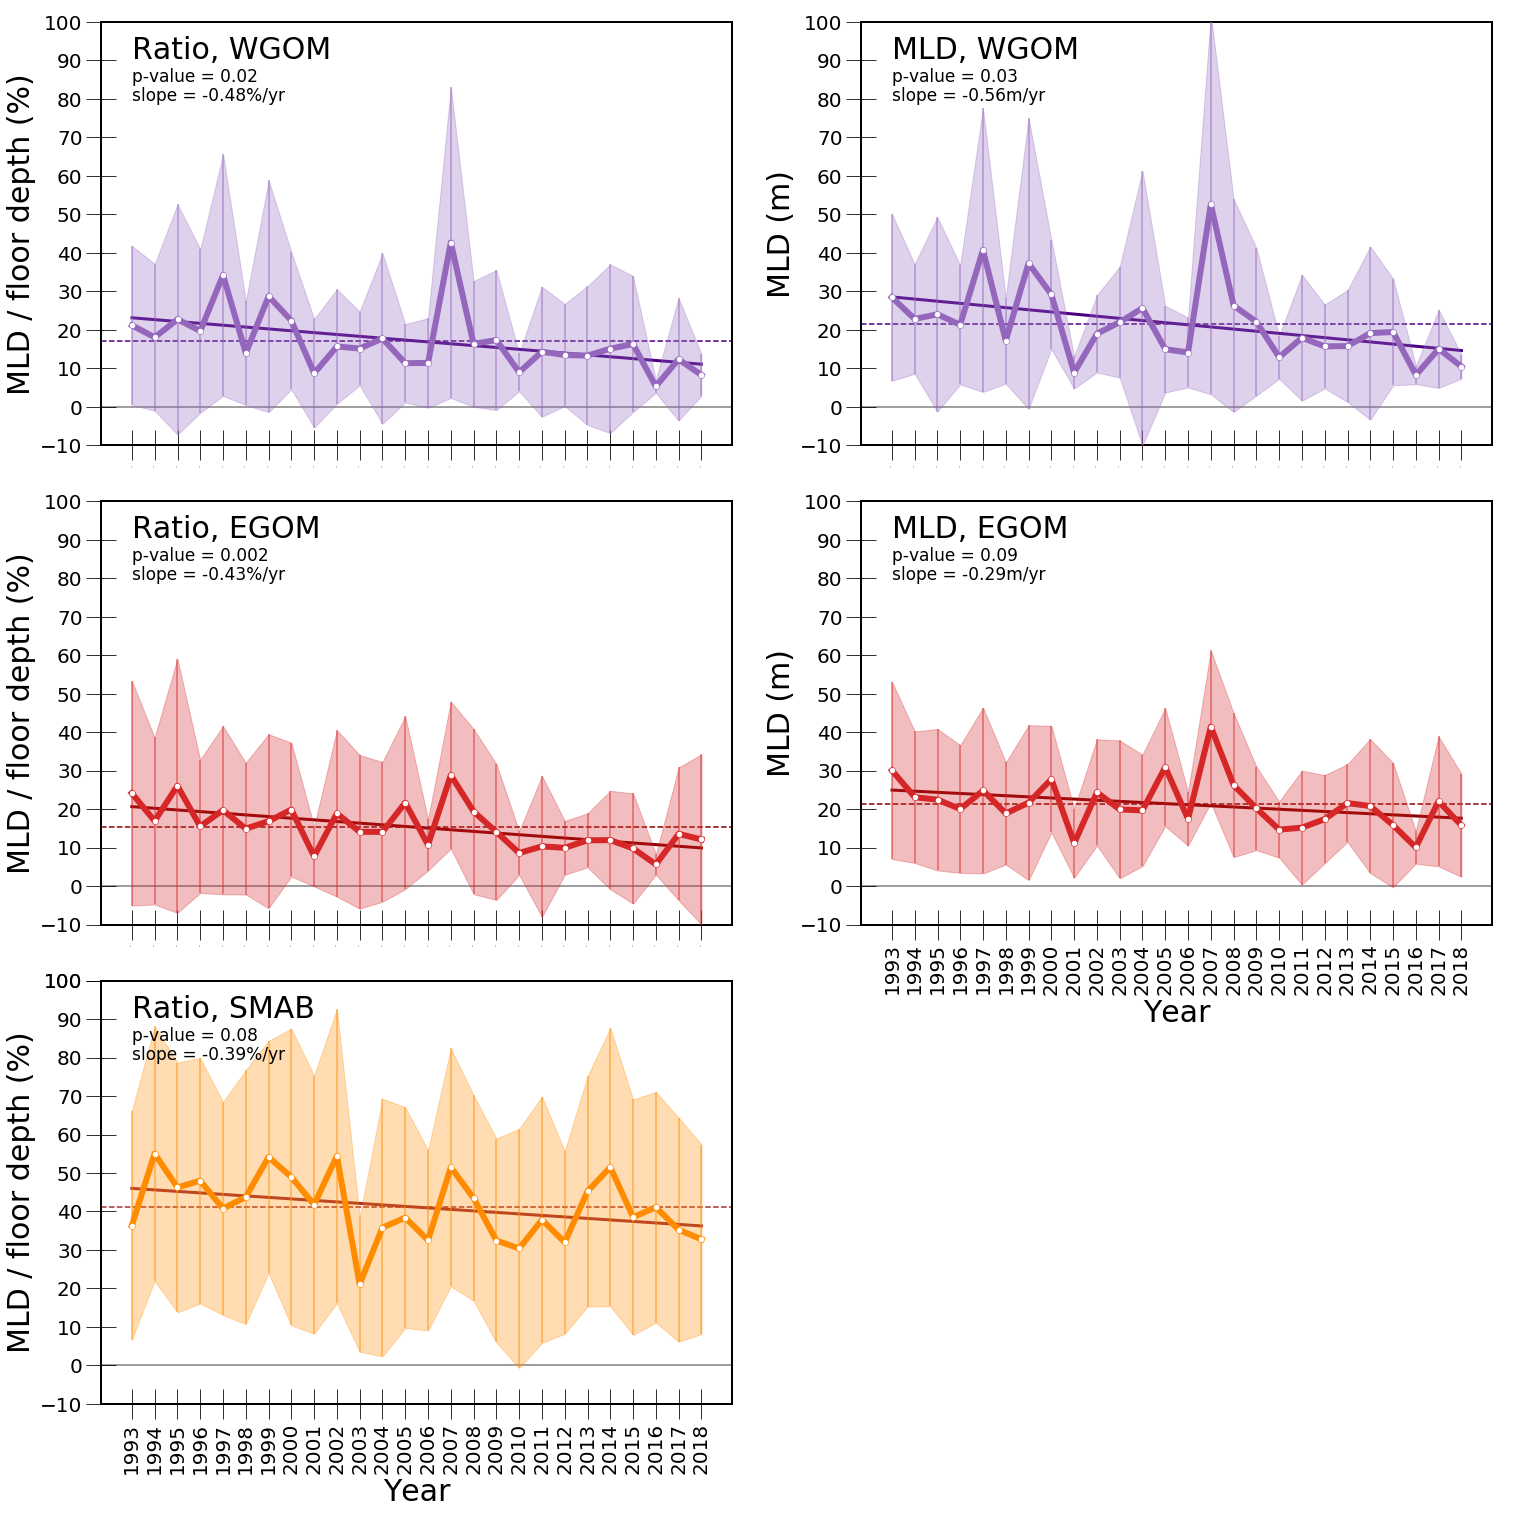

In [1055]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-10,100)
plt.plot(total_years, ratio_mean_sp_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,ratio_mean_sp_t, ratio_std_sp_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(ratio_mean_sp_t) - np.asarray(ratio_std_sp_t), np.asarray(ratio_mean_sp_t) + np.asarray(ratio_std_sp_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, ratio_mean_sp_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'Ratio, WGOM', dict(size=30))
plt.plot(x, -0.48201705919527293*x + 983.7574245530539, color='indigo',linewidth=3)
plt.ylabel('MLD / floor depth (%)',fontsize=30)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(ratio_mean_sp_t), color='indigo', linestyle='--',alpha = 1)
plt.text(1993, 84.5, 'p-value = 0.02', dict(size=17))
plt.text(1993, 79.5, 'slope = -0.48%/yr', dict(size=17))

plt.subplot(325)
plt.ylim(-10,100)
plt.plot(total_years, ratio_mean_sp_v, linestyle='-', color='darkorange', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,ratio_mean_sp_v, ratio_std_sp_v,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(ratio_mean_sp_v) - np.asarray(ratio_std_sp_v), np.asarray(ratio_mean_sp_v) + np.asarray(ratio_std_sp_v),color = 'darkorange', alpha = 0.3,zorder = 30)
plt.scatter(total_years, ratio_mean_sp_v,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,100], fontsize = 20) 
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.plot(x, -0.3901159608266053*x + 823.5011390413332, color='brown',linewidth=3)
plt.text(1993, 90.5, 'Ratio, SMAB', dict(size=30))
plt.xlabel('Year',fontsize=30)
plt.ylabel('MLD / floor depth (%)',fontsize=30)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(ratio_mean_sp_v), color='brown', linestyle='--',alpha = 1)
plt.text(1993, 84.5, 'p-value = 0.08', dict(size=17),zorder=100)
plt.text(1993, 79.5, 'slope = -0.39%/yr', dict(size=17),zorder=100)

plt.subplot(323)
plt.ylim(-10,100)
plt.plot(total_years, ratio_mean_sp_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,ratio_mean_sp_y, ratio_std_sp_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(ratio_mean_sp_y) - np.asarray(ratio_std_sp_y), np.asarray(ratio_mean_sp_y) + np.asarray(ratio_std_sp_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, ratio_mean_sp_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'Ratio, EGOM', dict(size=30))
plt.plot(x, -0.42904267482189556*x + 875.7172855781424, color='darkred',linewidth=3)
plt.ylabel('MLD / floor depth (%)',fontsize=30)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(ratio_mean_sp_y), color='darkred', linestyle='--',alpha = 1)
plt.text(1993, 84.5, 'p-value = 0.002', dict(size=17),zorder=100)
plt.text(1993, 79.5, 'slope = -0.43%/yr', dict(size=17),zorder=100)

plt.subplot(322)
plt.ylim(-10,100)
plt.plot(total_years, mean_sp_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_t, std_sp_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_t) - np.asarray(std_sp_t), np.asarray(mean_sp_t) + np.asarray(std_sp_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'MLD, WGOM', dict(size=30))
plt.ylabel('MLD (m)',fontsize=30)
plt.plot(x, -0.5571364074969547*x + 1138.8933674827845, color='indigo',linewidth=3)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_t), color='indigo', linestyle='--',alpha = 1)
plt.text(1993, 84.5, 'p-value = 0.03', dict(size=17))
plt.text(1993, 79.5, 'slope = -0.56m/yr', dict(size=17))

plt.subplot(324)
plt.ylim(-10,100)
plt.plot(total_years, mean_sp_y, linestyle='-', color='tab:red', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_y, std_sp_y,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_y) - np.asarray(std_sp_y), np.asarray(mean_sp_y) + np.asarray(std_sp_y),color = 'tab:red', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_y,color='white',s=20, alpha = 1, zorder = 60, edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'MLD, EGOM', dict(size=30))
plt.text(1993, 84.5, 'p-value = 0.09', dict(size=17))
plt.text(1993, 79.5, 'slope = -0.29m/yr', dict(size=17))


plt.plot(x, -0.29263229449091127*x + 608.1546489912064, color='darkred',linewidth=3)
plt.ylabel('MLD (m)',fontsize=30)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_y), color='darkred', linestyle='--',alpha = 1)
plt.xticks(total_years, fontsize = 20,rotation=90) 
plt.xlabel('Year',fontsize=30)


plt.savefig('seasonal_EGoM')
plt.show()

In [900]:
print(ratio_std_sp_t)

[20.644836698806905, 19.090793917229306, 29.93121855683958, 21.257662096792135, 31.382301004771858, 13.504511382946212, 30.112520607953737, 17.81510341883039, 14.11337387594127, 14.861465540060317, 9.58920704034978, 22.155051826475013, 10.180068953907357, 11.625814162618758, 40.39045714336076, 16.32385894445616, 18.184673927166052, 4.920187721127819, 16.905811837667272, 13.254367300137272, 18.02525084950818, 21.906713085619533, 17.686250665085886, 1.7033792534430068, 15.91902952173887, 5.474474202424972]


In [902]:
print(ratio_mean_sp_w)

[0.3213659020026894, 0.3821235222399881, 0.5249076315573583, 0.6722872536017656, 0.5603965443015732, 0.5917695663448176, 0.5808296292548167, 0.5824963812002746, 0.41439058781159, 0.6051920167141213, 0.49070287151195113, 0.47801836835899014, 0.5439616878040371, 0.5394189031081491, 0.5511294556924315, 0.6642981875675005, 0.4856161549669297, 0.5494448274300744, 0.5474503489893539, 0.5383790418730386, 0.5860766917264195, 0.49364976826987267, 0.40798280159063194, 0.2952155484864321, 0.48972320525307195, 0.42914708315041683]


In [903]:
ratio_mean_sp_t = [ i / 100 for i in ratio_mean_sp_t]

In [904]:
print(ratio_mean_sp_t)

[21.129615421404868, 18.02654698633254, 22.684610251314563, 19.669042114259874, 34.19075009207514, 13.915890285746402, 28.686888290670296, 22.341336608910346, 8.69013161593161, 15.640674901793023, 15.116520830080416, 17.71915896923939, 11.29950721959759, 11.363642281286927, 42.647468133979665, 16.3174809923233, 17.303658559902203, 8.94636565350207, 14.272016311713127, 13.438320639575597, 13.281896533931478, 15.05690454439097, 16.282365284897775, 5.279506986204803, 12.323553435731876, 8.253667815487233]


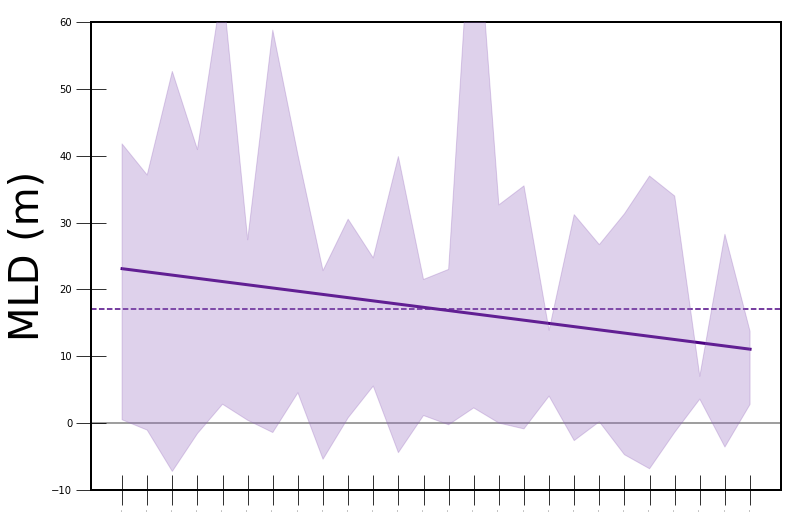

In [905]:
plt.figure(figsize=(25,25))
plt.figure(1)

plt.xlim(1992,2019)

plt.subplot(321)
plt.ylim(-10,60)
# plt.plot(total_years, ratio_mean_sp_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
# plt.errorbar(total_years,ratio_mean_sp_t, ratio_std_sp_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(ratio_mean_sp_t) - np.asarray(ratio_std_sp_t), np.asarray(ratio_mean_sp_t) + np.asarray(ratio_std_sp_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
# plt.scatter(total_years, ratio_mean_sp_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
# plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100,110], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
# plt.text(1993, 90.5, 'MLD, WGOM', dict(size=40))
plt.plot(x, -0.48201705919527293*x + 983.7574245530539, color='indigo',linewidth=3)
# plt.xlabel('Year',fontsize=40)
plt.ylabel('MLD (m)',fontsize=40)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(ratio_mean_sp_t), color='indigo', linestyle='--',alpha = 1)

In [1053]:
fall_mean = [7.9633007, 7.861857, 7.447263, 7.537016, 7.411359, 7.5941935, 7.611486, 7.413688, 7.2905517, 8.263543, 6.7897034, 7.642858, 7.5895233, 7.120693, 7.258164, 7.352061, 7.480826, 8.45417, 7.3872247, 7.3858166, 7.396061, 7.626788, 7.6730003, 7.528113, 7.6487813, 8.231745]







In [1004]:
print(np.max(mean_f_t))
print(np.max(mean_f_y))
print(np.max(mean_f_x))
print(np.min(mean_f_t))
print(np.min(mean_f_y))

print(np.min(mean_sp_v))

36.975
39.976190476190474
28.022222222222222
15.629139072847682
16.692307692307693
15.6


In [999]:
print(mean_f_x)

[21.058823529411764, 13.814814814814815, 25.03846153846154, 14.764705882352942, 18.4, 22.404255319148938, 22.52173913043478, 21.68, 13.921052631578947, 28.022222222222222, 13.2, 19.736842105263158, 20.833333333333332, 15.50943396226415, 19.1, 23.725806451612904, 20.324675324675326, 25.646153846153847, 19.770833333333332, 19.593220338983052, 23.51923076923077, 26.306122448979593, 19.603448275862068, 25.58695652173913, 26.434782608695652, 23.170212765957448]


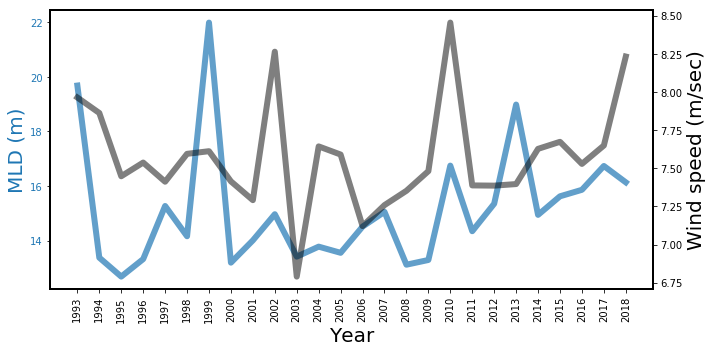

In [1054]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
# ax1.set_ylim((10,40))
ax1.set_xlabel('Year', fontsize = 20)
ax1.set_ylabel('MLD (m)', color=color, fontsize = 20)
ax1.plot(total_years, mean_f_y, linewidth = 6, color=color, alpha = 0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.set_xticks(total_years) 
ax1.set_yticklabels([12,14,16,18,20,22,24,26,28],color='tab:blue',fontsize = 10)


ax1.set_xticklabels(total_years, rotation=90, fontsize = 10)
# ax1.set_yticklabels([10,15,20,25,30,35,40])

color = 'k'
# ax2.set_ylim((6.6,7.6))
ax2.set_ylabel('Wind speed (m/sec)', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(total_years, fall_mean, linewidth = 6, color=color, alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yticklabels('y',color='k',alpha = 0.5, fontsize = 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('seasonal_EGoM')


plt.show()

In [ ]:
plt.subplot(322)
plt.ylim(-10,100)
plt.plot(total_years, mean_sp_t, linestyle='-', color='tab:purple', linewidth=6,alpha = 1, zorder= 30)
plt.errorbar(total_years,mean_sp_t, std_sp_t,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(total_years, np.asarray(mean_sp_t) - np.asarray(std_sp_t), np.asarray(mean_sp_t) + np.asarray(std_sp_t),color = 'tab:purple', alpha = 0.3,zorder = 30)
plt.scatter(total_years, mean_sp_t,color='white',s=20, alpha = 1, zorder = 60,edgecolor='white')
plt.yticks([-10,0,10,20,30,40,50,60,70,80,90,100], fontsize = 20) 
plt.tick_params(axis="y", direction='inout',length=30)
plt.tick_params(axis="x", direction='inout',length=30)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.xticks(total_years, fontsize = 0,rotation=90) 
plt.text(1993, 90.5, 'MLD, WGOM', dict(size=30))
plt.ylabel('MLD (m)',fontsize=30)
plt.plot(x, -0.5571364074969547*x + 1138.8933674827845, color='indigo',linewidth=3)
plt.tight_layout(pad=15, w_pad=2,h_pad =2)
plt.axhline(y=np.nanmean(mean_sp_t), color='indigo', linestyle='--',alpha = 1)
plt.text(1993, 84.5, 'p-value = 0.03', dict(size=17))
plt.text(1993, 79.5, 'slope = -0.56m/yr', dict(size=17))

In [978]:
fname ='wind-adaptor.mars.internal-1598399500.1663413-7474-3-df035ece-01a4-4e80-a685-554ea53e9d02.nc'

In [979]:
DS=xr.open_dataset(fname)

In [981]:
print(DS['si10'])

<xarray.DataArray 'si10' (time: 312, latitude: 45, longitude: 61)>
[856440 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -78.0 -77.75 -77.5 ... -63.5 -63.25 -63.0
  * latitude   (latitude) float32 46.0 45.75 45.5 45.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2018-12-01
Attributes:
    units:      m s**-1
    long_name:  10 metre wind speed


In [ ]:
aug_list = [pd.read_csv('savedall/aug_x.csv'),pd.read_csv('savedall/aug_v.csv'),pd.read_csv('savedall/aug_w.csv'),
           pd.read_csv('savedall/aug_y.csv'),pd.read_csv('savedall/aug_t.csv')]

# Winter

In [66]:
winter_x_list = [pd.read_csv('savedall/dec_x.csv'), pd.read_csv('savedall/jan_x.csv'), pd.read_csv('savedall/feb_x.csv')]
winter_x = pd.concat(winter_x_list)

winter_y_list = [pd.read_csv('savedall/dec_y.csv'), pd.read_csv('savedall/jan_y.csv'), pd.read_csv('savedall/feb_y.csv')]
winter_y = pd.concat(winter_y_list)

winter_w_list = [pd.read_csv('savedall/dec_w.csv'), pd.read_csv('savedall/jan_w.csv'), pd.read_csv('savedall/feb_w.csv')]
winter_w = pd.concat(winter_w_list)

winter_t_list = [pd.read_csv('savedall/dec_t.csv'), pd.read_csv('savedall/jan_t.csv'), pd.read_csv('savedall/feb_t.csv')]
winter_t = pd.concat(winter_t_list)

winter_v_list = [pd.read_csv('savedall/dec_v.csv'), pd.read_csv('savedall/jan_v.csv'), pd.read_csv('savedall/feb_v.csv')]
winter_v = pd.concat(winter_v_list)

In [67]:
print(len(winter_x))
print(len(winter_y))
print(len(winter_w))
print(len(winter_t))
print(len(winter_v))

752
204
1375
480
978


# Spring

In [75]:
spring_x_list = [pd.read_csv('savedall/march_x.csv'), pd.read_csv('savedall/april_x.csv'), pd.read_csv('savedall/may_x.csv')]
spring_x = pd.concat(spring_x_list)

spring_y_list = [pd.read_csv('savedall/march_y.csv'), pd.read_csv('savedall/april_y.csv'), pd.read_csv('savedall/may_y.csv')]
spring_y = pd.concat(spring_y_list)

spring_w_list = [pd.read_csv('savedall/march_w.csv'), pd.read_csv('savedall/april_w.csv'), pd.read_csv('savedall/may_w.csv')]
spring_w = pd.concat(spring_w_list)

spring_t_list = [pd.read_csv('savedall/march_t.csv'), pd.read_csv('savedall/april_t.csv'), pd.read_csv('savedall/may_t.csv')]
spring_t = pd.concat(spring_t_list)

spring_v_list = [pd.read_csv('savedall/march_v.csv'), pd.read_csv('savedall/april_v.csv'), pd.read_csv('savedall/may_v.csv')]
spring_v = pd.concat(spring_v_list)


In [76]:
print(len(spring_x))
print(len(spring_y))
print(len(spring_w))
print(len(spring_t))
print(len(spring_v))

1243
965
4122
2074
1810


# Summer

In [78]:
summer_x_list = [pd.read_csv('savedall/june_x.csv'), pd.read_csv('savedall/july_x.csv'), pd.read_csv('savedall/aug_x.csv')]
summer_x = pd.concat(summer_x_list)

summer_y_list = [pd.read_csv('savedall/june_y.csv'), pd.read_csv('savedall/july_y.csv'), pd.read_csv('savedall/aug_y.csv')]
summer_y = pd.concat(summer_y_list)

summer_w_list = [pd.read_csv('savedall/june_w.csv'), pd.read_csv('savedall/july_w.csv'), pd.read_csv('savedall/aug_w.csv')]
summer_w = pd.concat(summer_w_list)

summer_t_list = [pd.read_csv('savedall/june_t.csv'), pd.read_csv('savedall/july_t.csv'), pd.read_csv('savedall/aug_t.csv')]
summer_t = pd.concat(summer_t_list)

summer_v_list = [pd.read_csv('savedall/june_v.csv'), pd.read_csv('savedall/july_v.csv'), pd.read_csv('savedall/aug_v.csv')]
summer_v = pd.concat(summer_v_list)

In [79]:
print(len(summer_x))
print(len(summer_y))
print(len(summer_w))
print(len(summer_t))
print(len(summer_v))

916
805
3248
1160
1503


# Fall

In [80]:
fall_x_list = [pd.read_csv('savedall/sept_x.csv'), pd.read_csv('savedall/oct_x.csv'), pd.read_csv('savedall/nov_x.csv')]
fall_x = pd.concat(fall_x_list)

fall_y_list = [pd.read_csv('savedall/sept_y.csv'), pd.read_csv('savedall/oct_y.csv'), pd.read_csv('savedall/nov_y.csv')]
fall_y = pd.concat(fall_y_list)

fall_w_list = [pd.read_csv('savedall/sept_w.csv'), pd.read_csv('savedall/oct_w.csv'), pd.read_csv('savedall/nov_w.csv')]
fall_w = pd.concat(fall_w_list)

fall_t_list = [pd.read_csv('savedall/sept_t.csv'), pd.read_csv('savedall/oct_t.csv'), pd.read_csv('savedall/nov_t.csv')]
fall_t = pd.concat(fall_t_list)

fall_v_list = [pd.read_csv('savedall/sept_v.csv'), pd.read_csv('savedall/oct_v.csv'), pd.read_csv('savedall/nov_v.csv')]
fall_v = pd.concat(fall_v_list)

In [81]:
print(len(fall_x))
print(len(fall_y))
print(len(fall_w))
print(len(fall_t))
print(len(fall_v))

1362
1394
2404
2593
1760


In [93]:
spring_x_interannual = spring_x.groupby('year_').agg(np.mean)
spring_x_interannual_std = spring_x.groupby('year_').agg(np.std)
years_x = list(spring_x_interannual.index)
obs_MLD_x = list(spring_x_interannual['obs_MLD'].values)

spring_y_interannual = spring_y.groupby('year_').agg(np.mean)
spring_y_interannual_std = spring_y.groupby('year_').agg(np.std)
years_y = list(spring_y_interannual.index)
obs_MLD_y = list(spring_y_interannual['obs_MLD'].values)

spring_w_interannual = spring_w.groupby('year_').agg(np.mean)
spring_w_interannual_std = spring_w.groupby('year_').agg(np.std)
years_w = list(spring_w_interannual.index)
obs_MLD_w = list(spring_w_interannual['obs_MLD'].values)

spring_t_interannual = spring_t.groupby('year_').agg(np.mean)
spring_t_interannual_std = spring_t.groupby('year_').agg(np.std)
years_t = list(spring_t_interannual.index)
obs_MLD_t = list(spring_t_interannual['obs_MLD'].values)

spring_v_interannual = spring_v.groupby('year_').agg(np.mean)
spring_v_interannual_std = spring_v.groupby('year_').agg(np.std)
years_v = list(spring_v_interannual.index)
obs_MLD_v = list(spring_v_interannual['obs_MLD'].values)

In [94]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(years_v, obs_MLD_v) # ratio_mean_sp_v
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(years_x, obs_MLD_x) # ratio_mean_sp_v
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(years_w, obs_MLD_w) # ratio_mean_sp_v
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(years_y, obs_MLD_y) # ratio_mean_sp_v
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(years_t, obs_MLD_t) # ratio_mean_sp_v
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')

slope:   -0.02381627327829551
r_value: -0.0309575306766515
p_value: 0.8806657831540581
std_err: 0.1569616896920132

slope:   -0.16884504223311894
r_value: -0.2000276329311245
p_value: 0.32721866216137374
std_err: 0.16882074508568498

slope:   -0.1509655487732748
r_value: -0.16269860983385984
p_value: 0.4271284505483647
std_err: 0.18688001907786098

slope:   -0.306305092246169
r_value: -0.35406822233007185
p_value: 0.07596268976221297
std_err: 0.16514873217026999

slope:   -0.545869940675814
r_value: -0.4725592675043162
p_value: 0.014777141087519045
std_err: 0.20780237114409397



In [97]:
def autocorr(x):
    result = numpy.correlate(x, x, mode='full')
    return result[result.size/2:]

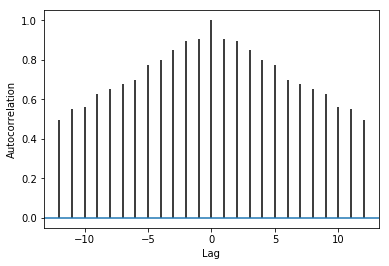

In [107]:
import matplotlib.pyplot as plot

import numpy as np

plot.acorr(obs_MLD_x, maxlags=12)
plot.xlabel('Lag')
plot.ylabel('Autocorrelation')
plot.show()

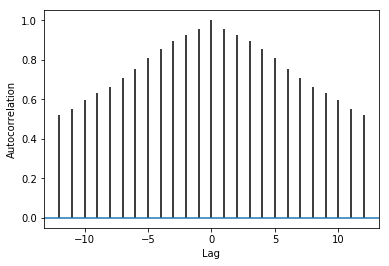

In [111]:
import matplotlib.pyplot as plot

import numpy as np

plot.acorr(obs_MLD_w, maxlags=12)
plot.xlabel('Lag')
plot.ylabel('Autocorrelation')
plot.show()